# ImageNet 데이터셋 검증 
> InceptionResnetV2

### import

In [1]:
import os
from datetime import datetime

#### GPU 사용여부# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

print(tf.__version__)

2.8.0


#### GPU 사용여부

In [2]:
print("GPU is", "available" if len(tf.config.list_physical_devices('GPU')) > 0 else "NOT AVAILABLE")

GPU is available


# ImageNet load

In [3]:
# Get imagenet labels
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

# Set data_dir to a read-only storage of .tar files
# Set write_dir to a w/r storage
data_dir = "C:/Users/DI Lee/Desktop/research_tensorflow/imagenet"
write_dir = "C:/Users/DI Lee/Desktop/research_tensorflow/tf-imagenet-dirs"

# Construct a tf.data.Dataset
download_config = tfds.download.DownloadConfig(
                      extract_dir=os.path.join(write_dir, 'extracted'),
                      manual_dir=data_dir
                  )
download_and_prepare_kwargs = {
    'download_dir': os.path.join(write_dir, 'downloaded'),
    'download_config': download_config,
}
ds = tfds.load('imagenet2012_subset', 
               data_dir=os.path.join(write_dir, 'data'),         
               split='validation', 
               shuffle_files=False, 
               download=True, 
               as_supervised=True,
               download_and_prepare_kwargs=download_and_prepare_kwargs)

# InceptionResnetV2

### Preprocess for InceptionResnetV2

image shape: (1, 299, 299, 3) label: ['European fire salamander']


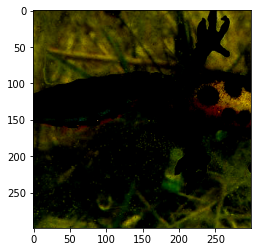

image shape: (1, 299, 299, 3) label: ['mushroom']


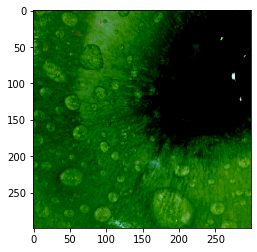

In [4]:
# Preprocess the images
def resize_with_crop_InceptionResnetV2(image, label):
    i = image
    i = tf.cast(i, tf.float32)
    i = tf.image.resize_with_crop_or_pad(i, 299, 299)
    i = tf.keras.applications.inception_resnet_v2.preprocess_input(i)
    return (i, label)

ds_InceptionResnetV2 = ds.map(resize_with_crop_InceptionResnetV2)

# Plot a few
ds_InceptionResnetV2 = ds_InceptionResnetV2.batch(1).prefetch(tf.data.experimental.AUTOTUNE)
for example in ds_InceptionResnetV2.take(2):
    image, label = example
    print(f'image shape: {image.shape} label: {imagenet_labels[label]}')
    plt.imshow(tf.squeeze(image, axis=0))
    plt.show()

# Original weight

## Evaluation

In [5]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights='imagenet')
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                               

 batch_normalization_5 (BatchNo  (None, 35, 35, 96)  288         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 64)  192         ['conv2d_11[0][0]']              
 ormalizat

 activation_21 (Activation)     (None, 35, 35, 32)   0           ['batch_normalization_21[0][0]'] 
                                                                                                  
 conv2d_19 (Conv2D)             (None, 35, 35, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_22 (Conv2D)             (None, 35, 35, 48)   13824       ['activation_21[0][0]']          
                                                                                                  
 batch_normalization_19 (BatchN  (None, 35, 35, 32)  96          ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 48)  144         ['conv2d_22[0][0]']              
 ormalizat

                                                                                                  
 activation_24 (Activation)     (None, 35, 35, 32)   0           ['batch_normalization_24[0][0]'] 
                                                                                                  
 activation_26 (Activation)     (None, 35, 35, 32)   0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 activation_29 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_24[0][0]',          
                                                                  'activation_26[0][0]',          
                                                                  'activation_29[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_40 (BatchN  (None, 35, 35, 48)  144         ['conv2d_40[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_37 (Activation)     (None, 35, 35, 32)   0           ['batch_normalization_37[0][0]'] 
                                                                                                  
 activation_40 (Activation)     (None, 35, 35, 48)   0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_36 (Conv2D)             (None, 35, 35, 32)   10240       ['block35_4_ac[0][0]']           
          

 block35_6_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_42[0][0]',          
                                                                  'activation_44[0][0]',          
                                                                  'activation_47[0][0]']          
                                                                                                  
 block35_6_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 35, 35, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 35, 35, 320)  0           ['block35_6[0][0]']              
          

 activation_58 (Activation)     (None, 35, 35, 48)   0           ['batch_normalization_58[0][0]'] 
                                                                                                  
 conv2d_54 (Conv2D)             (None, 35, 35, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_56 (Conv2D)             (None, 35, 35, 32)   9216        ['activation_55[0][0]']          
                                                                                                  
 conv2d_59 (Conv2D)             (None, 35, 35, 64)   27648       ['activation_58[0][0]']          
                                                                                                  
 batch_normalization_54 (BatchN  (None, 35, 35, 32)  96          ['conv2d_54[0][0]']              
 ormalization)                                                                                    
          

                                                                  'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 35, 35, 320)  0           ['block35_9[0][0]']              
                                                                                                  
 conv2d_69 (Conv2D)             (None, 35, 35, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_69 (BatchN  (None, 35, 35, 32)  96          ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_69 (Activation)     (None, 35, 35, 32)   0           ['batch_normalization_69[0][0]'] 
          

 activation_75 (Activation)     (None, 17, 17, 384)  0           ['batch_normalization_75[0][0]'] 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 320)  0          ['block35_10_ac[0][0]']          
                                                                                                  
 mixed_6a (Concatenate)         (None, 17, 17, 1088  0           ['activation_72[0][0]',          
                                )                                 'activation_75[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_77 (Conv2D)             (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_nor

                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_85 (Conv2D)             (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_85 (BatchN  (None, 17, 17, 128)  384        ['conv2d_85[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_93 (Conv2D)             (None, 17, 17, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_93 (BatchN  (None, 17, 17, 128)  384        ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_93 (Activation)     (None, 17, 17, 128)  0           ['batch_normalization_93[0][0]'] 
                                                                                                  
 conv2d_94 (Conv2D)             (None, 17, 17, 160)  143360      ['activation_93[0][0]']          
          

                                                                                                  
 batch_normalization_101 (Batch  (None, 17, 17, 128)  384        ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_101 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_101[0][0]']
                                                                                                  
 conv2d_102 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_101[0][0]']         
                                                                                                  
 batch_normalization_102 (Batch  (None, 17, 17, 160)  480        ['conv2d_102[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 activation_109 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_109[0][0]']
                                                                                                  
 conv2d_110 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_109[0][0]']         
                                                                                                  
 batch_normalization_110 (Batch  (None, 17, 17, 160)  480        ['conv2d_110[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_110 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_110[0][0]']
                                                                                                  
 conv2d_10

 conv2d_118 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_117[0][0]']         
                                                                                                  
 batch_normalization_118 (Batch  (None, 17, 17, 160)  480        ['conv2d_118[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_118 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_118[0][0]']
                                                                                                  
 conv2d_116 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_10_ac[0][0]']          
                                                                                                  
 conv2d_119 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_118[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_126 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_126[0][0]']
                                                                                                  
 conv2d_124 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_127 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_126[0][0]']         
                                                                                                  
 batch_normalization_124 (Batch  (None, 17, 17, 192)  576        ['conv2d_124[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_132 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_135 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_134[0][0]']         
                                                                                                  
 batch_normalization_132 (Batch  (None, 17, 17, 192)  576        ['conv2d_132[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_135 (Batch  (None, 17, 17, 192)  576        ['conv2d_135[0][0]']             
 Normalization)                                                                                   
          

 conv2d_143 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_142[0][0]']         
                                                                                                  
 batch_normalization_140 (Batch  (None, 17, 17, 192)  576        ['conv2d_140[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_143 (Batch  (None, 17, 17, 192)  576        ['conv2d_143[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_140 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_140[0][0]']
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_151 (Batch  (None, 17, 17, 192)  576        ['conv2d_151[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 activation_151 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_151[0][0]']
                                                                                                  
 block17_19_mixed (Concatenate)  (None, 17, 17, 384)  0          ['activation_148[0][0]',         
          

 activation_156 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_156[0][0]']
                                                                                                  
 activation_158 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_158[0][0]']
                                                                                                  
 activation_161 (Activation)    (None, 17, 17, 288)  0           ['batch_normalization_161[0][0]']
                                                                                                  
 conv2d_157 (Conv2D)            (None, 8, 8, 384)    884736      ['activation_156[0][0]']         
                                                                                                  
 conv2d_159 (Conv2D)            (None, 8, 8, 288)    663552      ['activation_158[0][0]']         
                                                                                                  
 conv2d_16

                                                                                                  
 activation_169 (Activation)    (None, 8, 8, 224)    0           ['batch_normalization_169[0][0]']
                                                                                                  
 conv2d_167 (Conv2D)            (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_170 (Conv2D)            (None, 8, 8, 256)    172032      ['activation_169[0][0]']         
                                                                                                  
 batch_normalization_167 (Batch  (None, 8, 8, 192)   576         ['conv2d_167[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 batch_normalization_175 (Batch  (None, 8, 8, 192)   576         ['conv2d_175[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_178 (Batch  (None, 8, 8, 256)   768         ['conv2d_178[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_175 (Activation)    (None, 8, 8, 192)    0           ['batch_normalization_175[0][0]']
                                                                                                  
 activation_178 (Activation)    (None, 8, 8, 256)    0           ['batch_normalization_178[0][0]']
                                                                                                  
 block8_4_

                                                                                                  
 activation_186 (Activation)    (None, 8, 8, 256)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 8, 8, 448)    0           ['activation_183[0][0]',         
                                                                  'activation_186[0][0]']         
                                                                                                  
 block8_6_conv (Conv2D)         (None, 8, 8, 2080)   933920      ['block8_6_mixed[0][0]']         
                                                                                                  
 block8_6 (Lambda)              (None, 8, 8, 2080)   0           ['block8_5_ac[0][0]',            
                                                                  'block8_6_conv[0][0]']          
          

                                                                                                  
 block8_8 (Lambda)              (None, 8, 8, 2080)   0           ['block8_7_ac[0][0]',            
                                                                  'block8_8_conv[0][0]']          
                                                                                                  
 block8_8_ac (Activation)       (None, 8, 8, 2080)   0           ['block8_8[0][0]']               
                                                                                                  
 conv2d_196 (Conv2D)            (None, 8, 8, 192)    399360      ['block8_8_ac[0][0]']            
                                                                                                  
 batch_normalization_196 (Batch  (None, 8, 8, 192)   576         ['conv2d_196[0][0]']             
 Normalization)                                                                                   
          

 )                                                                                                
                                                                                                  
 conv_7b_ac (Activation)        (None, 8, 8, 1536)   0           ['conv_7b_bn[0][0]']             
                                                                                                  
 avg_pool (GlobalAveragePooling  (None, 1536)        0           ['conv_7b_ac[0][0]']             
 2D)                                                                                              
                                                                                                  
 predictions (Dense)            (None, 1000)         1537000     ['avg_pool[0][0]']               
                                                                                                  
Total params: 55,873,736
Trainable params: 0
Non-trainable params: 55,873,736
_______________________________

In [6]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>


C:\Users\DI Lee\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


50000/50000 [==============================] - 1472s 29ms/step - loss: 0.9137 - accuracy: 0.7887


In [7]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 0.9136508703231812, 'accuracy': 0.7886800169944763}


# 30bit weight (zero to last 2-bit)

## Evaluation

In [8]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights=r"C:\Users\DI Lee\Desktop\연구깃허브\weight\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_30bit.h5")
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 149, 149, 32  96         ['conv2d_203[0][0]']             
 Normalization)                 )                                               

 batch_normalization_208 (Batch  (None, 35, 35, 96)  288         ['conv2d_208[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_210 (Batch  (None, 35, 35, 64)  192         ['conv2d_210[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_213 (Batch  (None, 35, 35, 96)  288         ['conv2d_213[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_214 (Batch  (None, 35, 35, 64)  192         ['conv2d_214[0][0]']             
 Normaliza

 activation_224 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_224[0][0]']
                                                                                                  
 conv2d_222 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_225 (Conv2D)            (None, 35, 35, 48)   13824       ['activation_224[0][0]']         
                                                                                                  
 batch_normalization_222 (Batch  (None, 35, 35, 32)  96          ['conv2d_222[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_225 (Batch  (None, 35, 35, 48)  144         ['conv2d_225[0][0]']             
 Normaliza

                                                                                                  
 activation_227 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_227[0][0]']
                                                                                                  
 activation_229 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_229[0][0]']
                                                                                                  
 activation_232 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_232[0][0]']
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_227[0][0]',         
                                                                  'activation_229[0][0]',         
                                                                  'activation_232[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_243 (Batch  (None, 35, 35, 48)  144         ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_240 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_240[0][0]']
                                                                                                  
 activation_243 (Activation)    (None, 35, 35, 48)   0           ['batch_normalization_243[0][0]']
                                                                                                  
 conv2d_239 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_4_ac[0][0]']           
          

 block35_6_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_245[0][0]',         
                                                                  'activation_247[0][0]',         
                                                                  'activation_250[0][0]']         
                                                                                                  
 block35_6_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 35, 35, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 35, 35, 320)  0           ['block35_6[0][0]']              
          

 activation_261 (Activation)    (None, 35, 35, 48)   0           ['batch_normalization_261[0][0]']
                                                                                                  
 conv2d_257 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_259 (Conv2D)            (None, 35, 35, 32)   9216        ['activation_258[0][0]']         
                                                                                                  
 conv2d_262 (Conv2D)            (None, 35, 35, 64)   27648       ['activation_261[0][0]']         
                                                                                                  
 batch_normalization_257 (Batch  (None, 35, 35, 32)  96          ['conv2d_257[0][0]']             
 Normalization)                                                                                   
          

                                                                  'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 35, 35, 320)  0           ['block35_9[0][0]']              
                                                                                                  
 conv2d_272 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_272 (Batch  (None, 35, 35, 32)  96          ['conv2d_272[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_272 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_272[0][0]']
          

 activation_278 (Activation)    (None, 17, 17, 384)  0           ['batch_normalization_278[0][0]']
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 17, 17, 320)  0          ['block35_10_ac[0][0]']          
                                                                                                  
 mixed_6a (Concatenate)         (None, 17, 17, 1088  0           ['activation_275[0][0]',         
                                )                                 'activation_278[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_280 (Conv2D)            (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_nor

                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_288 (Conv2D)            (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_288 (Batch  (None, 17, 17, 128)  384        ['conv2d_288[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_296 (Conv2D)            (None, 17, 17, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_296 (Batch  (None, 17, 17, 128)  384        ['conv2d_296[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_296 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_296[0][0]']
                                                                                                  
 conv2d_297 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_296[0][0]']         
          

                                                                                                  
 batch_normalization_304 (Batch  (None, 17, 17, 128)  384        ['conv2d_304[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_304 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_304[0][0]']
                                                                                                  
 conv2d_305 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_304[0][0]']         
                                                                                                  
 batch_normalization_305 (Batch  (None, 17, 17, 160)  480        ['conv2d_305[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 activation_312 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_312[0][0]']
                                                                                                  
 conv2d_313 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_312[0][0]']         
                                                                                                  
 batch_normalization_313 (Batch  (None, 17, 17, 160)  480        ['conv2d_313[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_313 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_313[0][0]']
                                                                                                  
 conv2d_31

 conv2d_321 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_320[0][0]']         
                                                                                                  
 batch_normalization_321 (Batch  (None, 17, 17, 160)  480        ['conv2d_321[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_321 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_321[0][0]']
                                                                                                  
 conv2d_319 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_10_ac[0][0]']          
                                                                                                  
 conv2d_322 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_321[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_329 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_329[0][0]']
                                                                                                  
 conv2d_327 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_330 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_329[0][0]']         
                                                                                                  
 batch_normalization_327 (Batch  (None, 17, 17, 192)  576        ['conv2d_327[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_335 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_338 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_337[0][0]']         
                                                                                                  
 batch_normalization_335 (Batch  (None, 17, 17, 192)  576        ['conv2d_335[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_338 (Batch  (None, 17, 17, 192)  576        ['conv2d_338[0][0]']             
 Normalization)                                                                                   
          

 conv2d_346 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_345[0][0]']         
                                                                                                  
 batch_normalization_343 (Batch  (None, 17, 17, 192)  576        ['conv2d_343[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_346 (Batch  (None, 17, 17, 192)  576        ['conv2d_346[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_343 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_343[0][0]']
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_354 (Batch  (None, 17, 17, 192)  576        ['conv2d_354[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_351 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_351[0][0]']
                                                                                                  
 activation_354 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_354[0][0]']
                                                                                                  
 block17_19_mixed (Concatenate)  (None, 17, 17, 384)  0          ['activation_351[0][0]',         
          

 activation_359 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_359[0][0]']
                                                                                                  
 activation_361 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_361[0][0]']
                                                                                                  
 activation_364 (Activation)    (None, 17, 17, 288)  0           ['batch_normalization_364[0][0]']
                                                                                                  
 conv2d_360 (Conv2D)            (None, 8, 8, 384)    884736      ['activation_359[0][0]']         
                                                                                                  
 conv2d_362 (Conv2D)            (None, 8, 8, 288)    663552      ['activation_361[0][0]']         
                                                                                                  
 conv2d_36

                                                                                                  
 activation_372 (Activation)    (None, 8, 8, 224)    0           ['batch_normalization_372[0][0]']
                                                                                                  
 conv2d_370 (Conv2D)            (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_373 (Conv2D)            (None, 8, 8, 256)    172032      ['activation_372[0][0]']         
                                                                                                  
 batch_normalization_370 (Batch  (None, 8, 8, 192)   576         ['conv2d_370[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 batch_normalization_378 (Batch  (None, 8, 8, 192)   576         ['conv2d_378[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_381 (Batch  (None, 8, 8, 256)   768         ['conv2d_381[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_378 (Activation)    (None, 8, 8, 192)    0           ['batch_normalization_378[0][0]']
                                                                                                  
 activation_381 (Activation)    (None, 8, 8, 256)    0           ['batch_normalization_381[0][0]']
                                                                                                  
 block8_4_

                                                                                                  
 activation_389 (Activation)    (None, 8, 8, 256)    0           ['batch_normalization_389[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 8, 8, 448)    0           ['activation_386[0][0]',         
                                                                  'activation_389[0][0]']         
                                                                                                  
 block8_6_conv (Conv2D)         (None, 8, 8, 2080)   933920      ['block8_6_mixed[0][0]']         
                                                                                                  
 block8_6 (Lambda)              (None, 8, 8, 2080)   0           ['block8_5_ac[0][0]',            
                                                                  'block8_6_conv[0][0]']          
          

                                                                                                  
 block8_8 (Lambda)              (None, 8, 8, 2080)   0           ['block8_7_ac[0][0]',            
                                                                  'block8_8_conv[0][0]']          
                                                                                                  
 block8_8_ac (Activation)       (None, 8, 8, 2080)   0           ['block8_8[0][0]']               
                                                                                                  
 conv2d_399 (Conv2D)            (None, 8, 8, 192)    399360      ['block8_8_ac[0][0]']            
                                                                                                  
 batch_normalization_399 (Batch  (None, 8, 8, 192)   576         ['conv2d_399[0][0]']             
 Normalization)                                                                                   
          

 )                                                                                                
                                                                                                  
 conv_7b_ac (Activation)        (None, 8, 8, 1536)   0           ['conv_7b_bn[0][0]']             
                                                                                                  
 avg_pool (GlobalAveragePooling  (None, 1536)        0           ['conv_7b_ac[0][0]']             
 2D)                                                                                              
                                                                                                  
 predictions (Dense)            (None, 1000)         1537000     ['avg_pool[0][0]']               
                                                                                                  
Total params: 55,873,736
Trainable params: 0
Non-trainable params: 55,873,736
_______________________________

In [9]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>
50000/50000 [==============================] - 1474s 29ms/step - loss: 0.9137 - accuracy: 0.7887


In [10]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 0.913654625415802, 'accuracy': 0.7886800169944763}


# 28bit weight (zero to 4-bit)

## Evaluation

In [11]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights=r"C:\Users\DI Lee\Desktop\연구깃허브\weight\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_28bit.h5")
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_406 (Conv2D)            (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_406 (Batch  (None, 149, 149, 32  96         ['conv2d_406[0][0]']             
 Normalization)                 )                                               

 batch_normalization_411 (Batch  (None, 35, 35, 96)  288         ['conv2d_411[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_413 (Batch  (None, 35, 35, 64)  192         ['conv2d_413[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_416 (Batch  (None, 35, 35, 96)  288         ['conv2d_416[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_417 (Batch  (None, 35, 35, 64)  192         ['conv2d_417[0][0]']             
 Normaliza

 activation_427 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_427[0][0]']
                                                                                                  
 conv2d_425 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_428 (Conv2D)            (None, 35, 35, 48)   13824       ['activation_427[0][0]']         
                                                                                                  
 batch_normalization_425 (Batch  (None, 35, 35, 32)  96          ['conv2d_425[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_428 (Batch  (None, 35, 35, 48)  144         ['conv2d_428[0][0]']             
 Normaliza

                                                                                                  
 activation_430 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_430[0][0]']
                                                                                                  
 activation_432 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_432[0][0]']
                                                                                                  
 activation_435 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_435[0][0]']
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_430[0][0]',         
                                                                  'activation_432[0][0]',         
                                                                  'activation_435[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_446 (Batch  (None, 35, 35, 48)  144         ['conv2d_446[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_443 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_443[0][0]']
                                                                                                  
 activation_446 (Activation)    (None, 35, 35, 48)   0           ['batch_normalization_446[0][0]']
                                                                                                  
 conv2d_442 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_4_ac[0][0]']           
          

 block35_6_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_448[0][0]',         
                                                                  'activation_450[0][0]',         
                                                                  'activation_453[0][0]']         
                                                                                                  
 block35_6_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 35, 35, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 35, 35, 320)  0           ['block35_6[0][0]']              
          

 activation_464 (Activation)    (None, 35, 35, 48)   0           ['batch_normalization_464[0][0]']
                                                                                                  
 conv2d_460 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_462 (Conv2D)            (None, 35, 35, 32)   9216        ['activation_461[0][0]']         
                                                                                                  
 conv2d_465 (Conv2D)            (None, 35, 35, 64)   27648       ['activation_464[0][0]']         
                                                                                                  
 batch_normalization_460 (Batch  (None, 35, 35, 32)  96          ['conv2d_460[0][0]']             
 Normalization)                                                                                   
          

                                                                  'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 35, 35, 320)  0           ['block35_9[0][0]']              
                                                                                                  
 conv2d_475 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_475 (Batch  (None, 35, 35, 32)  96          ['conv2d_475[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_475 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_475[0][0]']
          

 activation_481 (Activation)    (None, 17, 17, 384)  0           ['batch_normalization_481[0][0]']
                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 17, 17, 320)  0          ['block35_10_ac[0][0]']          
 )                                                                                                
                                                                                                  
 mixed_6a (Concatenate)         (None, 17, 17, 1088  0           ['activation_478[0][0]',         
                                )                                 'activation_481[0][0]',         
                                                                  'max_pooling2d_10[0][0]']       
                                                                                                  
 conv2d_483 (Conv2D)            (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
          

 block17_2 (Lambda)             (None, 17, 17, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_491 (Conv2D)            (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_491 (Batch  (None, 17, 17, 128)  384        ['conv2d_491[0][0]']             
 Normalization)                                                                                   
          

 block17_4_ac (Activation)      (None, 17, 17, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_499 (Conv2D)            (None, 17, 17, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_499 (Batch  (None, 17, 17, 128)  384        ['conv2d_499[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_499 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_499[0][0]']
                                                                                                  
 conv2d_50

 conv2d_507 (Conv2D)            (None, 17, 17, 128)  139264      ['block17_6_ac[0][0]']           
                                                                                                  
 batch_normalization_507 (Batch  (None, 17, 17, 128)  384        ['conv2d_507[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_507 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_507[0][0]']
                                                                                                  
 conv2d_508 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_507[0][0]']         
                                                                                                  
 batch_normalization_508 (Batch  (None, 17, 17, 160)  480        ['conv2d_508[0][0]']             
 Normaliza

 Normalization)                                                                                   
                                                                                                  
 activation_515 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_515[0][0]']
                                                                                                  
 conv2d_516 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_515[0][0]']         
                                                                                                  
 batch_normalization_516 (Batch  (None, 17, 17, 160)  480        ['conv2d_516[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_516 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_516[0][0]']
          

                                                                                                  
 conv2d_524 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_523[0][0]']         
                                                                                                  
 batch_normalization_524 (Batch  (None, 17, 17, 160)  480        ['conv2d_524[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_524 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_524[0][0]']
                                                                                                  
 conv2d_522 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_10_ac[0][0]']          
                                                                                                  
 conv2d_52

 batch_normalization_532 (Batch  (None, 17, 17, 160)  480        ['conv2d_532[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_532 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_532[0][0]']
                                                                                                  
 conv2d_530 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_533 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_532[0][0]']         
                                                                                                  
 batch_normalization_530 (Batch  (None, 17, 17, 192)  576        ['conv2d_530[0][0]']             
 Normaliza

 activation_540 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_540[0][0]']
                                                                                                  
 conv2d_538 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_541 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_540[0][0]']         
                                                                                                  
 batch_normalization_538 (Batch  (None, 17, 17, 192)  576        ['conv2d_538[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_541 (Batch  (None, 17, 17, 192)  576        ['conv2d_541[0][0]']             
 Normaliza

                                                                                                  
 conv2d_549 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_548[0][0]']         
                                                                                                  
 batch_normalization_546 (Batch  (None, 17, 17, 192)  576        ['conv2d_546[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_549 (Batch  (None, 17, 17, 192)  576        ['conv2d_549[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_546 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_546[0][0]']
          

 batch_normalization_554 (Batch  (None, 17, 17, 192)  576        ['conv2d_554[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_557 (Batch  (None, 17, 17, 192)  576        ['conv2d_557[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_554 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_554[0][0]']
                                                                                                  
 activation_557 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_557[0][0]']
                                                                                                  
 block17_1

                                                                                                  
 activation_562 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_562[0][0]']
                                                                                                  
 activation_564 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_564[0][0]']
                                                                                                  
 activation_567 (Activation)    (None, 17, 17, 288)  0           ['batch_normalization_567[0][0]']
                                                                                                  
 conv2d_563 (Conv2D)            (None, 8, 8, 384)    884736      ['activation_562[0][0]']         
                                                                                                  
 conv2d_565 (Conv2D)            (None, 8, 8, 288)    663552      ['activation_564[0][0]']         
          

 batch_normalization_575 (Batch  (None, 8, 8, 224)   672         ['conv2d_575[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_575 (Activation)    (None, 8, 8, 224)    0           ['batch_normalization_575[0][0]']
                                                                                                  
 conv2d_573 (Conv2D)            (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_576 (Conv2D)            (None, 8, 8, 256)    172032      ['activation_575[0][0]']         
                                                                                                  
 batch_normalization_573 (Batch  (None, 8, 8, 192)   576         ['conv2d_573[0][0]']             
 Normaliza

 conv2d_584 (Conv2D)            (None, 8, 8, 256)    172032      ['activation_583[0][0]']         
                                                                                                  
 batch_normalization_581 (Batch  (None, 8, 8, 192)   576         ['conv2d_581[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_584 (Batch  (None, 8, 8, 256)   768         ['conv2d_584[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_581 (Activation)    (None, 8, 8, 192)    0           ['batch_normalization_581[0][0]']
                                                                                                  
 activatio

                                                                                                  
 activation_589 (Activation)    (None, 8, 8, 192)    0           ['batch_normalization_589[0][0]']
                                                                                                  
 activation_592 (Activation)    (None, 8, 8, 256)    0           ['batch_normalization_592[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 8, 8, 448)    0           ['activation_589[0][0]',         
                                                                  'activation_592[0][0]']         
                                                                                                  
 block8_6_conv (Conv2D)         (None, 8, 8, 2080)   933920      ['block8_6_mixed[0][0]']         
                                                                                                  
 block8_6 

                                                                                                  
 block8_8_conv (Conv2D)         (None, 8, 8, 2080)   933920      ['block8_8_mixed[0][0]']         
                                                                                                  
 block8_8 (Lambda)              (None, 8, 8, 2080)   0           ['block8_7_ac[0][0]',            
                                                                  'block8_8_conv[0][0]']          
                                                                                                  
 block8_8_ac (Activation)       (None, 8, 8, 2080)   0           ['block8_8[0][0]']               
                                                                                                  
 conv2d_602 (Conv2D)            (None, 8, 8, 192)    399360      ['block8_8_ac[0][0]']            
                                                                                                  
 batch_nor

                                                                                                  
 conv_7b_bn (BatchNormalization  (None, 8, 8, 1536)  4608        ['conv_7b[0][0]']                
 )                                                                                                
                                                                                                  
 conv_7b_ac (Activation)        (None, 8, 8, 1536)   0           ['conv_7b_bn[0][0]']             
                                                                                                  
 avg_pool (GlobalAveragePooling  (None, 1536)        0           ['conv_7b_ac[0][0]']             
 2D)                                                                                              
                                                                                                  
 predictions (Dense)            (None, 1000)         1537000     ['avg_pool[0][0]']               
          

In [12]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>
50000/50000 [==============================] - 1467s 29ms/step - loss: 0.9137 - accuracy: 0.7887


In [13]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 0.9136548638343811, 'accuracy': 0.7886800169944763}


# 26bit weight (zero to 6-bit)

## Evaluation

In [14]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights=r"C:\Users\DI Lee\Desktop\연구깃허브\weight\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_26bit.h5")
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_609 (Conv2D)            (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_609 (Batch  (None, 149, 149, 32  96         ['conv2d_609[0][0]']             
 Normalization)                 )                                               

 conv2d_620 (Conv2D)            (None, 35, 35, 64)   12288       ['average_pooling2d_3[0][0]']    
                                                                                                  
 batch_normalization_614 (Batch  (None, 35, 35, 96)  288         ['conv2d_614[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_616 (Batch  (None, 35, 35, 64)  192         ['conv2d_616[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_619 (Batch  (None, 35, 35, 96)  288         ['conv2d_619[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 activation_630 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_630[0][0]']
                                                                                                  
 conv2d_628 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_631 (Conv2D)            (None, 35, 35, 48)   13824       ['activation_630[0][0]']         
                                                                                                  
 batch_normalization_628 (Batch  (None, 35, 35, 32)  96          ['conv2d_628[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_638 (Batch  (None, 35, 35, 64)  192         ['conv2d_638[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_633 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_633[0][0]']
                                                                                                  
 activation_635 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_635[0][0]']
                                                                                                  
 activation_638 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_638[0][0]']
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_633[0][0]',         
          

                                                                                                  
 batch_normalization_646 (Batch  (None, 35, 35, 32)  96          ['conv2d_646[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_649 (Batch  (None, 35, 35, 48)  144         ['conv2d_649[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_646 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_646[0][0]']
                                                                                                  
 activation_649 (Activation)    (None, 35, 35, 48)   0           ['batch_normalization_649[0][0]']
          

 activation_656 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_656[0][0]']
                                                                                                  
 block35_6_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_651[0][0]',         
                                                                  'activation_653[0][0]',         
                                                                  'activation_656[0][0]']         
                                                                                                  
 block35_6_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 35, 35, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
          

 activation_664 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_664[0][0]']
                                                                                                  
 activation_667 (Activation)    (None, 35, 35, 48)   0           ['batch_normalization_667[0][0]']
                                                                                                  
 conv2d_663 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_665 (Conv2D)            (None, 35, 35, 32)   9216        ['activation_664[0][0]']         
                                                                                                  
 conv2d_668 (Conv2D)            (None, 35, 35, 64)   27648       ['activation_667[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 block35_9 (Lambda)             (None, 35, 35, 320)  0           ['block35_8_ac[0][0]',           
                                                                  'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 35, 35, 320)  0           ['block35_9[0][0]']              
                                                                                                  
 conv2d_678 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_678 (Batch  (None, 35, 35, 32)  96          ['conv2d_678[0][0]']             
 Normalization)                                                                                   
          

 activation_681 (Activation)    (None, 17, 17, 384)  0           ['batch_normalization_681[0][0]']
                                                                                                  
 activation_684 (Activation)    (None, 17, 17, 384)  0           ['batch_normalization_684[0][0]']
                                                                                                  
 max_pooling2d_14 (MaxPooling2D  (None, 17, 17, 320)  0          ['block35_10_ac[0][0]']          
 )                                                                                                
                                                                                                  
 mixed_6a (Concatenate)         (None, 17, 17, 1088  0           ['activation_681[0][0]',         
                                )                                 'activation_684[0][0]',         
                                                                  'max_pooling2d_14[0][0]']       
          

                                )                                                                 
                                                                                                  
 block17_2 (Lambda)             (None, 17, 17, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_694 (Conv2D)            (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_nor

                                )                                 'block17_4_conv[0][0]']         
                                                                                                  
 block17_4_ac (Activation)      (None, 17, 17, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_702 (Conv2D)            (None, 17, 17, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_702 (Batch  (None, 17, 17, 128)  384        ['conv2d_702[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_710 (Conv2D)            (None, 17, 17, 128)  139264      ['block17_6_ac[0][0]']           
                                                                                                  
 batch_normalization_710 (Batch  (None, 17, 17, 128)  384        ['conv2d_710[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_710 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_710[0][0]']
                                                                                                  
 conv2d_711 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_710[0][0]']         
          

                                                                                                  
 batch_normalization_718 (Batch  (None, 17, 17, 128)  384        ['conv2d_718[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_718 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_718[0][0]']
                                                                                                  
 conv2d_719 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_718[0][0]']         
                                                                                                  
 batch_normalization_719 (Batch  (None, 17, 17, 160)  480        ['conv2d_719[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 activation_726 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_726[0][0]']
                                                                                                  
 conv2d_727 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_726[0][0]']         
                                                                                                  
 batch_normalization_727 (Batch  (None, 17, 17, 160)  480        ['conv2d_727[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_727 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_727[0][0]']
                                                                                                  
 conv2d_72

 conv2d_735 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_734[0][0]']         
                                                                                                  
 batch_normalization_735 (Batch  (None, 17, 17, 160)  480        ['conv2d_735[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_735 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_735[0][0]']
                                                                                                  
 conv2d_733 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_736 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_735[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_743 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_743[0][0]']
                                                                                                  
 conv2d_741 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_744 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_743[0][0]']         
                                                                                                  
 batch_normalization_741 (Batch  (None, 17, 17, 192)  576        ['conv2d_741[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_749 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_16_ac[0][0]']          
                                                                                                  
 conv2d_752 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_751[0][0]']         
                                                                                                  
 batch_normalization_749 (Batch  (None, 17, 17, 192)  576        ['conv2d_749[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_752 (Batch  (None, 17, 17, 192)  576        ['conv2d_752[0][0]']             
 Normalization)                                                                                   
          

 conv2d_760 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_759[0][0]']         
                                                                                                  
 batch_normalization_757 (Batch  (None, 17, 17, 192)  576        ['conv2d_757[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_760 (Batch  (None, 17, 17, 192)  576        ['conv2d_760[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_757 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_757[0][0]']
                                                                                                  
 activatio

 batch_normalization_770 (Batch  (None, 17, 17, 288)  864        ['conv2d_770[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_765 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_765[0][0]']
                                                                                                  
 activation_767 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_767[0][0]']
                                                                                                  
 activation_770 (Activation)    (None, 17, 17, 288)  0           ['batch_normalization_770[0][0]']
                                                                                                  
 conv2d_766 (Conv2D)            (None, 8, 8, 384)    884736      ['activation_765[0][0]']         
          

 conv2d_778 (Conv2D)            (None, 8, 8, 224)    129024      ['activation_777[0][0]']         
                                                                                                  
 batch_normalization_778 (Batch  (None, 8, 8, 224)   672         ['conv2d_778[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_778 (Activation)    (None, 8, 8, 224)    0           ['batch_normalization_778[0][0]']
                                                                                                  
 conv2d_776 (Conv2D)            (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_779 (Conv2D)            (None, 8, 8, 256)    172032      ['activation_778[0][0]']         
          

 conv2d_784 (Conv2D)            (None, 8, 8, 192)    399360      ['block8_3_ac[0][0]']            
                                                                                                  
 conv2d_787 (Conv2D)            (None, 8, 8, 256)    172032      ['activation_786[0][0]']         
                                                                                                  
 batch_normalization_784 (Batch  (None, 8, 8, 192)   576         ['conv2d_784[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_787 (Batch  (None, 8, 8, 256)   768         ['conv2d_787[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 batch_normalization_795 (Batch  (None, 8, 8, 256)   768         ['conv2d_795[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_792 (Activation)    (None, 8, 8, 192)    0           ['batch_normalization_792[0][0]']
                                                                                                  
 activation_795 (Activation)    (None, 8, 8, 256)    0           ['batch_normalization_795[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 8, 8, 448)    0           ['activation_792[0][0]',         
                                                                  'activation_795[0][0]']         
                                                                                                  
 block8_6_

 block8_8_mixed (Concatenate)   (None, 8, 8, 448)    0           ['activation_800[0][0]',         
                                                                  'activation_803[0][0]']         
                                                                                                  
 block8_8_conv (Conv2D)         (None, 8, 8, 2080)   933920      ['block8_8_mixed[0][0]']         
                                                                                                  
 block8_8 (Lambda)              (None, 8, 8, 2080)   0           ['block8_7_ac[0][0]',            
                                                                  'block8_8_conv[0][0]']          
                                                                                                  
 block8_8_ac (Activation)       (None, 8, 8, 2080)   0           ['block8_8[0][0]']               
                                                                                                  
 conv2d_80

                                                                                                  
 conv_7b (Conv2D)               (None, 8, 8, 1536)   3194880     ['block8_10[0][0]']              
                                                                                                  
 conv_7b_bn (BatchNormalization  (None, 8, 8, 1536)  4608        ['conv_7b[0][0]']                
 )                                                                                                
                                                                                                  
 conv_7b_ac (Activation)        (None, 8, 8, 1536)   0           ['conv_7b_bn[0][0]']             
                                                                                                  
 avg_pool (GlobalAveragePooling  (None, 1536)        0           ['conv_7b_ac[0][0]']             
 2D)                                                                                              
          

In [15]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>
50000/50000 [==============================] - 1475s 29ms/step - loss: 0.9137 - accuracy: 0.7887


In [16]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 0.9136554002761841, 'accuracy': 0.7886800169944763}


# 24bit weight (zero to 8-bit)

## Evaluation

In [18]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights=r"C:\Users\DI Lee\Desktop\연구깃허브\weight\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_24bit.h5")
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_812 (Conv2D)            (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_812 (Batch  (None, 149, 149, 32  96         ['conv2d_812[0][0]']             
 Normalization)                 )                                               

 conv2d_823 (Conv2D)            (None, 35, 35, 64)   12288       ['average_pooling2d_4[0][0]']    
                                                                                                  
 batch_normalization_817 (Batch  (None, 35, 35, 96)  288         ['conv2d_817[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_819 (Batch  (None, 35, 35, 64)  192         ['conv2d_819[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_822 (Batch  (None, 35, 35, 96)  288         ['conv2d_822[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 activation_833 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_833[0][0]']
                                                                                                  
 conv2d_831 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_834 (Conv2D)            (None, 35, 35, 48)   13824       ['activation_833[0][0]']         
                                                                                                  
 batch_normalization_831 (Batch  (None, 35, 35, 32)  96          ['conv2d_831[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_841 (Batch  (None, 35, 35, 64)  192         ['conv2d_841[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_836 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_836[0][0]']
                                                                                                  
 activation_838 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_838[0][0]']
                                                                                                  
 activation_841 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_841[0][0]']
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_836[0][0]',         
          

                                                                                                  
 batch_normalization_849 (Batch  (None, 35, 35, 32)  96          ['conv2d_849[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_852 (Batch  (None, 35, 35, 48)  144         ['conv2d_852[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_849 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_849[0][0]']
                                                                                                  
 activation_852 (Activation)    (None, 35, 35, 48)   0           ['batch_normalization_852[0][0]']
          

 activation_859 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_859[0][0]']
                                                                                                  
 block35_6_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_854[0][0]',         
                                                                  'activation_856[0][0]',         
                                                                  'activation_859[0][0]']         
                                                                                                  
 block35_6_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 35, 35, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
          

 activation_867 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_867[0][0]']
                                                                                                  
 activation_870 (Activation)    (None, 35, 35, 48)   0           ['batch_normalization_870[0][0]']
                                                                                                  
 conv2d_866 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_868 (Conv2D)            (None, 35, 35, 32)   9216        ['activation_867[0][0]']         
                                                                                                  
 conv2d_871 (Conv2D)            (None, 35, 35, 64)   27648       ['activation_870[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 block35_9 (Lambda)             (None, 35, 35, 320)  0           ['block35_8_ac[0][0]',           
                                                                  'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 35, 35, 320)  0           ['block35_9[0][0]']              
                                                                                                  
 conv2d_881 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_881 (Batch  (None, 35, 35, 32)  96          ['conv2d_881[0][0]']             
 Normalization)                                                                                   
          

 activation_884 (Activation)    (None, 17, 17, 384)  0           ['batch_normalization_884[0][0]']
                                                                                                  
 activation_887 (Activation)    (None, 17, 17, 384)  0           ['batch_normalization_887[0][0]']
                                                                                                  
 max_pooling2d_18 (MaxPooling2D  (None, 17, 17, 320)  0          ['block35_10_ac[0][0]']          
 )                                                                                                
                                                                                                  
 mixed_6a (Concatenate)         (None, 17, 17, 1088  0           ['activation_884[0][0]',         
                                )                                 'activation_887[0][0]',         
                                                                  'max_pooling2d_18[0][0]']       
          

                                )                                                                 
                                                                                                  
 block17_2 (Lambda)             (None, 17, 17, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_897 (Conv2D)            (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_nor

                                )                                 'block17_4_conv[0][0]']         
                                                                                                  
 block17_4_ac (Activation)      (None, 17, 17, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_905 (Conv2D)            (None, 17, 17, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_905 (Batch  (None, 17, 17, 128)  384        ['conv2d_905[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_913 (Conv2D)            (None, 17, 17, 128)  139264      ['block17_6_ac[0][0]']           
                                                                                                  
 batch_normalization_913 (Batch  (None, 17, 17, 128)  384        ['conv2d_913[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_913 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_913[0][0]']
                                                                                                  
 conv2d_914 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_913[0][0]']         
          

                                                                                                  
 batch_normalization_921 (Batch  (None, 17, 17, 128)  384        ['conv2d_921[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_921 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_921[0][0]']
                                                                                                  
 conv2d_922 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_921[0][0]']         
                                                                                                  
 batch_normalization_922 (Batch  (None, 17, 17, 160)  480        ['conv2d_922[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 activation_929 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_929[0][0]']
                                                                                                  
 conv2d_930 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_929[0][0]']         
                                                                                                  
 batch_normalization_930 (Batch  (None, 17, 17, 160)  480        ['conv2d_930[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_930 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_930[0][0]']
                                                                                                  
 conv2d_92

 conv2d_938 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_937[0][0]']         
                                                                                                  
 batch_normalization_938 (Batch  (None, 17, 17, 160)  480        ['conv2d_938[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_938 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_938[0][0]']
                                                                                                  
 conv2d_936 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_939 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_938[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_946 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_946[0][0]']
                                                                                                  
 conv2d_944 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_947 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_946[0][0]']         
                                                                                                  
 batch_normalization_944 (Batch  (None, 17, 17, 192)  576        ['conv2d_944[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_952 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_16_ac[0][0]']          
                                                                                                  
 conv2d_955 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_954[0][0]']         
                                                                                                  
 batch_normalization_952 (Batch  (None, 17, 17, 192)  576        ['conv2d_952[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_955 (Batch  (None, 17, 17, 192)  576        ['conv2d_955[0][0]']             
 Normalization)                                                                                   
          

 conv2d_963 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_962[0][0]']         
                                                                                                  
 batch_normalization_960 (Batch  (None, 17, 17, 192)  576        ['conv2d_960[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_963 (Batch  (None, 17, 17, 192)  576        ['conv2d_963[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_960 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_960[0][0]']
                                                                                                  
 activatio

 batch_normalization_973 (Batch  (None, 17, 17, 288)  864        ['conv2d_973[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_968 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_968[0][0]']
                                                                                                  
 activation_970 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_970[0][0]']
                                                                                                  
 activation_973 (Activation)    (None, 17, 17, 288)  0           ['batch_normalization_973[0][0]']
                                                                                                  
 conv2d_969 (Conv2D)            (None, 8, 8, 384)    884736      ['activation_968[0][0]']         
          

 conv2d_981 (Conv2D)            (None, 8, 8, 224)    129024      ['activation_980[0][0]']         
                                                                                                  
 batch_normalization_981 (Batch  (None, 8, 8, 224)   672         ['conv2d_981[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_981 (Activation)    (None, 8, 8, 224)    0           ['batch_normalization_981[0][0]']
                                                                                                  
 conv2d_979 (Conv2D)            (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_982 (Conv2D)            (None, 8, 8, 256)    172032      ['activation_981[0][0]']         
          

 conv2d_987 (Conv2D)            (None, 8, 8, 192)    399360      ['block8_3_ac[0][0]']            
                                                                                                  
 conv2d_990 (Conv2D)            (None, 8, 8, 256)    172032      ['activation_989[0][0]']         
                                                                                                  
 batch_normalization_987 (Batch  (None, 8, 8, 192)   576         ['conv2d_987[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_990 (Batch  (None, 8, 8, 256)   768         ['conv2d_990[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 batch_normalization_998 (Batch  (None, 8, 8, 256)   768         ['conv2d_998[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_995 (Activation)    (None, 8, 8, 192)    0           ['batch_normalization_995[0][0]']
                                                                                                  
 activation_998 (Activation)    (None, 8, 8, 256)    0           ['batch_normalization_998[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 8, 8, 448)    0           ['activation_995[0][0]',         
                                                                  'activation_998[0][0]']         
                                                                                                  
 block8_6_

                                                                                                  
 activation_1003 (Activation)   (None, 8, 8, 192)    0           ['batch_normalization_1003[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1006 (Activation)   (None, 8, 8, 256)    0           ['batch_normalization_1006[0][0]'
                                                                 ]                                
                                                                                                  
 block8_8_mixed (Concatenate)   (None, 8, 8, 448)    0           ['activation_1003[0][0]',        
                                                                  'activation_1006[0][0]']        
                                                                                                  
 block8_8_

 hNormalization)                                                                                  
                                                                                                  
 activation_1011 (Activation)   (None, 8, 8, 192)    0           ['batch_normalization_1011[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1014 (Activation)   (None, 8, 8, 256)    0           ['batch_normalization_1014[0][0]'
                                                                 ]                                
                                                                                                  
 block8_10_mixed (Concatenate)  (None, 8, 8, 448)    0           ['activation_1011[0][0]',        
                                                                  'activation_1014[0][0]']        
          

In [19]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>
50000/50000 [==============================] - 1473s 29ms/step - loss: 0.9137 - accuracy: 0.7887


In [20]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 0.9136533737182617, 'accuracy': 0.7886999845504761}


# 22bit weight (zero to 10-bit)

## Evaluation

In [21]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights=r"C:\Users\DI Lee\Desktop\연구깃허브\weight\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_22bit.h5")
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1015 (Conv2D)           (None, 149, 149, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_1015 (Batc  (None, 149, 149, 32  96         ['conv2d_1015[0][0]']            
 hNormalization)                )                                               

                                                                                                  
 conv2d_1022 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1021[0][0]']        
                                                                                                  
 conv2d_1025 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1024[0][0]']        
                                                                                                  
 conv2d_1026 (Conv2D)           (None, 35, 35, 64)   12288       ['average_pooling2d_5[0][0]']    
                                                                                                  
 batch_normalization_1020 (Batc  (None, 35, 35, 96)  288         ['conv2d_1020[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

                                                                                                  
 block35_1_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_1027[0][0]',        
                                                                  'activation_1029[0][0]',        
                                                                  'activation_1032[0][0]']        
                                                                                                  
 block35_1_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_1_mixed[0][0]']        
                                                                                                  
 block35_1 (Lambda)             (None, 35, 35, 320)  0           ['mixed_5b[0][0]',               
                                                                  'block35_1_conv[0][0]']         
                                                                                                  
 block35_1

 batch_normalization_1040 (Batc  (None, 35, 35, 32)  96          ['conv2d_1040[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1043 (Batc  (None, 35, 35, 48)  144         ['conv2d_1043[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1040 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1040[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1043 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_1043[0][0]'
          

 batch_normalization_1050 (Batc  (None, 35, 35, 64)  192         ['conv2d_1050[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1045 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1045[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1047 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1047[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1050 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1050[0][0]'
          

                                                                                                  
 batch_normalization_1060 (Batc  (None, 35, 35, 32)  96          ['conv2d_1060[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1060 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1060[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1058 (Conv2D)           (None, 35, 35, 32)   10240       ['block35_5_ac[0][0]']           
                                                                                                  
 conv2d_1061 (Conv2D)           (None, 35, 35, 48)   13824       ['activation_1060[0][0]']        
          

                                                                                                  
 conv2d_1065 (Conv2D)           (None, 35, 35, 32)   9216        ['activation_1064[0][0]']        
                                                                                                  
 conv2d_1068 (Conv2D)           (None, 35, 35, 64)   27648       ['activation_1067[0][0]']        
                                                                                                  
 batch_normalization_1063 (Batc  (None, 35, 35, 32)  96          ['conv2d_1063[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1065 (Batc  (None, 35, 35, 32)  96          ['conv2d_1065[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_1071[0][0]',        
                                                                  'activation_1074[0][0]']        
                                                                                                  
 block35_8_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_8_mixed[0][0]']        
                                                                                                  
 block35_8 (Lambda)             (None, 35, 35, 320)  0           ['block35_7_ac[0][0]',           
                                                                  'block35_8_conv[0][0]']         
                                                                                                  
 block35_8_ac (Activation)      (None, 35, 35, 320)  0           ['block35_8[0][0]']              
                                                                                                  
 conv2d_10

                                                                                                  
 batch_normalization_1085 (Batc  (None, 35, 35, 48)  144         ['conv2d_1085[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1082 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1082[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1085 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_1085[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_10

                                                                                                  
 conv2d_1092 (Conv2D)           (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_1092 (Batc  (None, 17, 17, 128)  384        ['conv2d_1092[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1092 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1092[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1093 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_1092[0][0]']        
          

 block17_2 (Lambda)             (None, 17, 17, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_1100 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_1100 (Batc  (None, 17, 17, 128)  384        ['conv2d_1100[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_1106[0][0]']        
                                                                                                  
 block17_4_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_4_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_4 (Lambda)             (None, 17, 17, 1088  0           ['block17_3_ac[0][0]',           
                                )                                 'block17_4_conv[0][0]']         
                                                                                                  
 block17_4_ac (Activation)      (None, 17, 17, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
          

                                                                                                  
 activation_1114 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1114[0][0]'
                                                                 ]                                
                                                                                                  
 block17_6_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_1111[0][0]',        
                                                                  'activation_1114[0][0]']        
                                                                                                  
 block17_6_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_6_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_6

 batch_normalization_1122 (Batc  (None, 17, 17, 192)  576        ['conv2d_1122[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1119 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1119[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1122 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1122[0][0]'
                                                                 ]                                
                                                                                                  
 block17_8_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_1119[0][0]',        
          

 conv2d_1130 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_1129[0][0]']        
                                                                                                  
 batch_normalization_1127 (Batc  (None, 17, 17, 192)  576        ['conv2d_1127[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1130 (Batc  (None, 17, 17, 192)  576        ['conv2d_1130[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1127 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1127[0][0]'
                                                                 ]                                
          

 activation_1137 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1137[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1135 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_11_ac[0][0]']          
                                                                                                  
 conv2d_1138 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_1137[0][0]']        
                                                                                                  
 batch_normalization_1135 (Batc  (None, 17, 17, 192)  576        ['conv2d_1135[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 conv2d_1145 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_1144[0][0]']        
                                                                                                  
 batch_normalization_1145 (Batc  (None, 17, 17, 160)  480        ['conv2d_1145[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1145 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1145[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1143 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_13_ac[0][0]']          
                                                                                                  
 conv2d_11

 hNormalization)                                                                                  
                                                                                                  
 activation_1152 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1152[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1153 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_1152[0][0]']        
                                                                                                  
 batch_normalization_1153 (Batc  (None, 17, 17, 160)  480        ['conv2d_1153[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_1160 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_17_ac[0][0]']          
                                                                                                  
 batch_normalization_1160 (Batc  (None, 17, 17, 128)  384        ['conv2d_1160[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1160 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1160[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_11

                                                                                                  
 block17_19 (Lambda)            (None, 17, 17, 1088  0           ['block17_18_ac[0][0]',          
                                )                                 'block17_19_conv[0][0]']        
                                                                                                  
 block17_19_ac (Activation)     (None, 17, 17, 1088  0           ['block17_19[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_1168 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_19_ac[0][0]']          
                                                                                                  
 batch_normalization_1168 (Batc  (None, 17, 17, 128)  384        ['conv2d_1168[0][0]']            
 hNormaliz

 conv2d_1172 (Conv2D)           (None, 8, 8, 384)    884736      ['activation_1171[0][0]']        
                                                                                                  
 conv2d_1174 (Conv2D)           (None, 8, 8, 288)    663552      ['activation_1173[0][0]']        
                                                                                                  
 conv2d_1177 (Conv2D)           (None, 8, 8, 320)    829440      ['activation_1176[0][0]']        
                                                                                                  
 batch_normalization_1172 (Batc  (None, 8, 8, 384)   1152        ['conv2d_1172[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1174 (Batc  (None, 8, 8, 288)   864         ['conv2d_1174[0][0]']            
 hNormaliz

                                                                                                  
 batch_normalization_1184 (Batc  (None, 8, 8, 224)   672         ['conv2d_1184[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1184 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1184[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1182 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_1185 (Conv2D)           (None, 8, 8, 256)    172032      ['activation_1184[0][0]']        
          

 conv2d_1192 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1191[0][0]']        
                                                                                                  
 batch_normalization_1192 (Batc  (None, 8, 8, 224)   672         ['conv2d_1192[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1192 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1192[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1190 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_3_ac[0][0]']            
                                                                                                  
 conv2d_11

                                                                                                  
 conv2d_1200 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1199[0][0]']        
                                                                                                  
 batch_normalization_1200 (Batc  (None, 8, 8, 224)   672         ['conv2d_1200[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1200 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1200[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1198 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_5_ac[0][0]']            
          

                                                                 ]                                
                                                                                                  
 conv2d_1208 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1207[0][0]']        
                                                                                                  
 batch_normalization_1208 (Batc  (None, 8, 8, 224)   672         ['conv2d_1208[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1208 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1208[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_12

 activation_1215 (Activation)   (None, 8, 8, 192)    0           ['batch_normalization_1215[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1216 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1215[0][0]']        
                                                                                                  
 batch_normalization_1216 (Batc  (None, 8, 8, 224)   672         ['conv2d_1216[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1216 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1216[0][0]'
                                                                 ]                                
          

In [22]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>
50000/50000 [==============================] - 1478s 29ms/step - loss: 0.9137 - accuracy: 0.7886


In [23]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 0.9136591553688049, 'accuracy': 0.788640022277832}


# 20bit weight (zero to 12-bit)

## Evaluation

In [24]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights=r"C:\Users\DI Lee\Desktop\연구깃허브\weight\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_20bit.h5")
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1218 (Conv2D)           (None, 149, 149, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_1218 (Batc  (None, 149, 149, 32  96         ['conv2d_1218[0][0]']            
 hNormalization)                )                                               

                                                                                                  
 conv2d_1225 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1224[0][0]']        
                                                                                                  
 conv2d_1228 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1227[0][0]']        
                                                                                                  
 conv2d_1229 (Conv2D)           (None, 35, 35, 64)   12288       ['average_pooling2d_6[0][0]']    
                                                                                                  
 batch_normalization_1223 (Batc  (None, 35, 35, 96)  288         ['conv2d_1223[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

                                                                                                  
 block35_1_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_1230[0][0]',        
                                                                  'activation_1232[0][0]',        
                                                                  'activation_1235[0][0]']        
                                                                                                  
 block35_1_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_1_mixed[0][0]']        
                                                                                                  
 block35_1 (Lambda)             (None, 35, 35, 320)  0           ['mixed_5b[0][0]',               
                                                                  'block35_1_conv[0][0]']         
                                                                                                  
 block35_1

 batch_normalization_1243 (Batc  (None, 35, 35, 32)  96          ['conv2d_1243[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1246 (Batc  (None, 35, 35, 48)  144         ['conv2d_1246[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1243 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1243[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1246 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_1246[0][0]'
          

 batch_normalization_1253 (Batc  (None, 35, 35, 64)  192         ['conv2d_1253[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1248 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1248[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1250 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1250[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1253 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1253[0][0]'
          

                                                                                                  
 batch_normalization_1263 (Batc  (None, 35, 35, 32)  96          ['conv2d_1263[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1263 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1263[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1261 (Conv2D)           (None, 35, 35, 32)   10240       ['block35_5_ac[0][0]']           
                                                                                                  
 conv2d_1264 (Conv2D)           (None, 35, 35, 48)   13824       ['activation_1263[0][0]']        
          

                                                                                                  
 conv2d_1268 (Conv2D)           (None, 35, 35, 32)   9216        ['activation_1267[0][0]']        
                                                                                                  
 conv2d_1271 (Conv2D)           (None, 35, 35, 64)   27648       ['activation_1270[0][0]']        
                                                                                                  
 batch_normalization_1266 (Batc  (None, 35, 35, 32)  96          ['conv2d_1266[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1268 (Batc  (None, 35, 35, 32)  96          ['conv2d_1268[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_1274[0][0]',        
                                                                  'activation_1277[0][0]']        
                                                                                                  
 block35_8_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_8_mixed[0][0]']        
                                                                                                  
 block35_8 (Lambda)             (None, 35, 35, 320)  0           ['block35_7_ac[0][0]',           
                                                                  'block35_8_conv[0][0]']         
                                                                                                  
 block35_8_ac (Activation)      (None, 35, 35, 320)  0           ['block35_8[0][0]']              
                                                                                                  
 conv2d_12

                                                                                                  
 batch_normalization_1288 (Batc  (None, 35, 35, 48)  144         ['conv2d_1288[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1285 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1285[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1288 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_1288[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_12

                                                                                                  
 conv2d_1295 (Conv2D)           (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_1295 (Batc  (None, 17, 17, 128)  384        ['conv2d_1295[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1295 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1295[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1296 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_1295[0][0]']        
          

 block17_2 (Lambda)             (None, 17, 17, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_1303 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_1303 (Batc  (None, 17, 17, 128)  384        ['conv2d_1303[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_1309[0][0]']        
                                                                                                  
 block17_4_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_4_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_4 (Lambda)             (None, 17, 17, 1088  0           ['block17_3_ac[0][0]',           
                                )                                 'block17_4_conv[0][0]']         
                                                                                                  
 block17_4_ac (Activation)      (None, 17, 17, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
          

                                                                                                  
 activation_1317 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1317[0][0]'
                                                                 ]                                
                                                                                                  
 block17_6_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_1314[0][0]',        
                                                                  'activation_1317[0][0]']        
                                                                                                  
 block17_6_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_6_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_6

 batch_normalization_1325 (Batc  (None, 17, 17, 192)  576        ['conv2d_1325[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1322 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1322[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1325 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1325[0][0]'
                                                                 ]                                
                                                                                                  
 block17_8_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_1322[0][0]',        
          

 conv2d_1333 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_1332[0][0]']        
                                                                                                  
 batch_normalization_1330 (Batc  (None, 17, 17, 192)  576        ['conv2d_1330[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1333 (Batc  (None, 17, 17, 192)  576        ['conv2d_1333[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1330 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1330[0][0]'
                                                                 ]                                
          

 activation_1340 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1340[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1338 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_11_ac[0][0]']          
                                                                                                  
 conv2d_1341 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_1340[0][0]']        
                                                                                                  
 batch_normalization_1338 (Batc  (None, 17, 17, 192)  576        ['conv2d_1338[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 conv2d_1348 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_1347[0][0]']        
                                                                                                  
 batch_normalization_1348 (Batc  (None, 17, 17, 160)  480        ['conv2d_1348[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1348 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1348[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1346 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_13_ac[0][0]']          
                                                                                                  
 conv2d_13

 hNormalization)                                                                                  
                                                                                                  
 activation_1355 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1355[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1356 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_1355[0][0]']        
                                                                                                  
 batch_normalization_1356 (Batc  (None, 17, 17, 160)  480        ['conv2d_1356[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_1363 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_17_ac[0][0]']          
                                                                                                  
 batch_normalization_1363 (Batc  (None, 17, 17, 128)  384        ['conv2d_1363[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1363 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1363[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_13

                                                                                                  
 block17_19 (Lambda)            (None, 17, 17, 1088  0           ['block17_18_ac[0][0]',          
                                )                                 'block17_19_conv[0][0]']        
                                                                                                  
 block17_19_ac (Activation)     (None, 17, 17, 1088  0           ['block17_19[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_1371 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_19_ac[0][0]']          
                                                                                                  
 batch_normalization_1371 (Batc  (None, 17, 17, 128)  384        ['conv2d_1371[0][0]']            
 hNormaliz

 conv2d_1375 (Conv2D)           (None, 8, 8, 384)    884736      ['activation_1374[0][0]']        
                                                                                                  
 conv2d_1377 (Conv2D)           (None, 8, 8, 288)    663552      ['activation_1376[0][0]']        
                                                                                                  
 conv2d_1380 (Conv2D)           (None, 8, 8, 320)    829440      ['activation_1379[0][0]']        
                                                                                                  
 batch_normalization_1375 (Batc  (None, 8, 8, 384)   1152        ['conv2d_1375[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1377 (Batc  (None, 8, 8, 288)   864         ['conv2d_1377[0][0]']            
 hNormaliz

                                                                                                  
 batch_normalization_1387 (Batc  (None, 8, 8, 224)   672         ['conv2d_1387[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1387 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1387[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1385 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_1388 (Conv2D)           (None, 8, 8, 256)    172032      ['activation_1387[0][0]']        
          

 conv2d_1395 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1394[0][0]']        
                                                                                                  
 batch_normalization_1395 (Batc  (None, 8, 8, 224)   672         ['conv2d_1395[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1395 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1395[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1393 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_3_ac[0][0]']            
                                                                                                  
 conv2d_13

                                                                                                  
 conv2d_1403 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1402[0][0]']        
                                                                                                  
 batch_normalization_1403 (Batc  (None, 8, 8, 224)   672         ['conv2d_1403[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1403 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1403[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1401 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_5_ac[0][0]']            
          

                                                                 ]                                
                                                                                                  
 conv2d_1411 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1410[0][0]']        
                                                                                                  
 batch_normalization_1411 (Batc  (None, 8, 8, 224)   672         ['conv2d_1411[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1411 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1411[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_14

 activation_1418 (Activation)   (None, 8, 8, 192)    0           ['batch_normalization_1418[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1419 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1418[0][0]']        
                                                                                                  
 batch_normalization_1419 (Batc  (None, 8, 8, 224)   672         ['conv2d_1419[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1419 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1419[0][0]'
                                                                 ]                                
          

In [25]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>
50000/50000 [==============================] - 1466s 29ms/step - loss: 0.9137 - accuracy: 0.7886


In [26]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 0.9136635065078735, 'accuracy': 0.788640022277832}


# 18bit weight (zero to 14-bit)

## Evaluation

In [27]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights=r"C:\Users\DI Lee\Desktop\연구깃허브\weight\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_18bit.h5")
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1421 (Conv2D)           (None, 149, 149, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_1421 (Batc  (None, 149, 149, 32  96         ['conv2d_1421[0][0]']            
 hNormalization)                )                                               

                                                                                                  
 conv2d_1428 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1427[0][0]']        
                                                                                                  
 conv2d_1431 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1430[0][0]']        
                                                                                                  
 conv2d_1432 (Conv2D)           (None, 35, 35, 64)   12288       ['average_pooling2d_7[0][0]']    
                                                                                                  
 batch_normalization_1426 (Batc  (None, 35, 35, 96)  288         ['conv2d_1426[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

                                                                                                  
 block35_1_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_1433[0][0]',        
                                                                  'activation_1435[0][0]',        
                                                                  'activation_1438[0][0]']        
                                                                                                  
 block35_1_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_1_mixed[0][0]']        
                                                                                                  
 block35_1 (Lambda)             (None, 35, 35, 320)  0           ['mixed_5b[0][0]',               
                                                                  'block35_1_conv[0][0]']         
                                                                                                  
 block35_1

 batch_normalization_1446 (Batc  (None, 35, 35, 32)  96          ['conv2d_1446[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1449 (Batc  (None, 35, 35, 48)  144         ['conv2d_1449[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1446 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1446[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1449 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_1449[0][0]'
          

 batch_normalization_1456 (Batc  (None, 35, 35, 64)  192         ['conv2d_1456[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1451 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1451[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1453 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1453[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1456 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1456[0][0]'
          

                                                                                                  
 batch_normalization_1466 (Batc  (None, 35, 35, 32)  96          ['conv2d_1466[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1466 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1466[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1464 (Conv2D)           (None, 35, 35, 32)   10240       ['block35_5_ac[0][0]']           
                                                                                                  
 conv2d_1467 (Conv2D)           (None, 35, 35, 48)   13824       ['activation_1466[0][0]']        
          

                                                                                                  
 conv2d_1471 (Conv2D)           (None, 35, 35, 32)   9216        ['activation_1470[0][0]']        
                                                                                                  
 conv2d_1474 (Conv2D)           (None, 35, 35, 64)   27648       ['activation_1473[0][0]']        
                                                                                                  
 batch_normalization_1469 (Batc  (None, 35, 35, 32)  96          ['conv2d_1469[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1471 (Batc  (None, 35, 35, 32)  96          ['conv2d_1471[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_1477[0][0]',        
                                                                  'activation_1480[0][0]']        
                                                                                                  
 block35_8_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_8_mixed[0][0]']        
                                                                                                  
 block35_8 (Lambda)             (None, 35, 35, 320)  0           ['block35_7_ac[0][0]',           
                                                                  'block35_8_conv[0][0]']         
                                                                                                  
 block35_8_ac (Activation)      (None, 35, 35, 320)  0           ['block35_8[0][0]']              
                                                                                                  
 conv2d_14

                                                                                                  
 batch_normalization_1491 (Batc  (None, 35, 35, 48)  144         ['conv2d_1491[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1488 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1488[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1491 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_1491[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_14

                                                                                                  
 conv2d_1498 (Conv2D)           (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_1498 (Batc  (None, 17, 17, 128)  384        ['conv2d_1498[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1498 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1498[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1499 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_1498[0][0]']        
          

 block17_2 (Lambda)             (None, 17, 17, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_1506 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_1506 (Batc  (None, 17, 17, 128)  384        ['conv2d_1506[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_1512[0][0]']        
                                                                                                  
 block17_4_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_4_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_4 (Lambda)             (None, 17, 17, 1088  0           ['block17_3_ac[0][0]',           
                                )                                 'block17_4_conv[0][0]']         
                                                                                                  
 block17_4_ac (Activation)      (None, 17, 17, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
          

                                                                                                  
 activation_1520 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1520[0][0]'
                                                                 ]                                
                                                                                                  
 block17_6_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_1517[0][0]',        
                                                                  'activation_1520[0][0]']        
                                                                                                  
 block17_6_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_6_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_6

 batch_normalization_1528 (Batc  (None, 17, 17, 192)  576        ['conv2d_1528[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1525 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1525[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1528 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1528[0][0]'
                                                                 ]                                
                                                                                                  
 block17_8_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_1525[0][0]',        
          

 conv2d_1536 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_1535[0][0]']        
                                                                                                  
 batch_normalization_1533 (Batc  (None, 17, 17, 192)  576        ['conv2d_1533[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1536 (Batc  (None, 17, 17, 192)  576        ['conv2d_1536[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1533 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1533[0][0]'
                                                                 ]                                
          

 activation_1543 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1543[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1541 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_11_ac[0][0]']          
                                                                                                  
 conv2d_1544 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_1543[0][0]']        
                                                                                                  
 batch_normalization_1541 (Batc  (None, 17, 17, 192)  576        ['conv2d_1541[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 conv2d_1551 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_1550[0][0]']        
                                                                                                  
 batch_normalization_1551 (Batc  (None, 17, 17, 160)  480        ['conv2d_1551[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1551 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1551[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1549 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_13_ac[0][0]']          
                                                                                                  
 conv2d_15

 hNormalization)                                                                                  
                                                                                                  
 activation_1558 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1558[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1559 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_1558[0][0]']        
                                                                                                  
 batch_normalization_1559 (Batc  (None, 17, 17, 160)  480        ['conv2d_1559[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_1566 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_17_ac[0][0]']          
                                                                                                  
 batch_normalization_1566 (Batc  (None, 17, 17, 128)  384        ['conv2d_1566[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1566 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1566[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_15

                                                                                                  
 block17_19 (Lambda)            (None, 17, 17, 1088  0           ['block17_18_ac[0][0]',          
                                )                                 'block17_19_conv[0][0]']        
                                                                                                  
 block17_19_ac (Activation)     (None, 17, 17, 1088  0           ['block17_19[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_1574 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_19_ac[0][0]']          
                                                                                                  
 batch_normalization_1574 (Batc  (None, 17, 17, 128)  384        ['conv2d_1574[0][0]']            
 hNormaliz

 conv2d_1578 (Conv2D)           (None, 8, 8, 384)    884736      ['activation_1577[0][0]']        
                                                                                                  
 conv2d_1580 (Conv2D)           (None, 8, 8, 288)    663552      ['activation_1579[0][0]']        
                                                                                                  
 conv2d_1583 (Conv2D)           (None, 8, 8, 320)    829440      ['activation_1582[0][0]']        
                                                                                                  
 batch_normalization_1578 (Batc  (None, 8, 8, 384)   1152        ['conv2d_1578[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1580 (Batc  (None, 8, 8, 288)   864         ['conv2d_1580[0][0]']            
 hNormaliz

                                                                                                  
 batch_normalization_1590 (Batc  (None, 8, 8, 224)   672         ['conv2d_1590[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1590 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1590[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1588 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_1591 (Conv2D)           (None, 8, 8, 256)    172032      ['activation_1590[0][0]']        
          

 conv2d_1598 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1597[0][0]']        
                                                                                                  
 batch_normalization_1598 (Batc  (None, 8, 8, 224)   672         ['conv2d_1598[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1598 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1598[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1596 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_3_ac[0][0]']            
                                                                                                  
 conv2d_15

                                                                                                  
 conv2d_1606 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1605[0][0]']        
                                                                                                  
 batch_normalization_1606 (Batc  (None, 8, 8, 224)   672         ['conv2d_1606[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1606 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1606[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1604 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_5_ac[0][0]']            
          

                                                                 ]                                
                                                                                                  
 conv2d_1614 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1613[0][0]']        
                                                                                                  
 batch_normalization_1614 (Batc  (None, 8, 8, 224)   672         ['conv2d_1614[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1614 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1614[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_16

 activation_1621 (Activation)   (None, 8, 8, 192)    0           ['batch_normalization_1621[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1622 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1621[0][0]']        
                                                                                                  
 batch_normalization_1622 (Batc  (None, 8, 8, 224)   672         ['conv2d_1622[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1622 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1622[0][0]'
                                                                 ]                                
          

In [28]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>
50000/50000 [==============================] - 1469s 29ms/step - loss: 0.9138 - accuracy: 0.7886


In [29]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 0.9137696623802185, 'accuracy': 0.7886000275611877}


# 16bit weight (zero to 16-bit) - half

## Evaluation

In [30]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights=r"C:\Users\DI Lee\Desktop\연구깃허브\weight\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_16bit.h5")
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1624 (Conv2D)           (None, 149, 149, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_1624 (Batc  (None, 149, 149, 32  96         ['conv2d_1624[0][0]']            
 hNormalization)                )                                               

                                                                                                  
 conv2d_1631 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1630[0][0]']        
                                                                                                  
 conv2d_1634 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1633[0][0]']        
                                                                                                  
 conv2d_1635 (Conv2D)           (None, 35, 35, 64)   12288       ['average_pooling2d_8[0][0]']    
                                                                                                  
 batch_normalization_1629 (Batc  (None, 35, 35, 96)  288         ['conv2d_1629[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

                                                                                                  
 block35_1_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_1636[0][0]',        
                                                                  'activation_1638[0][0]',        
                                                                  'activation_1641[0][0]']        
                                                                                                  
 block35_1_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_1_mixed[0][0]']        
                                                                                                  
 block35_1 (Lambda)             (None, 35, 35, 320)  0           ['mixed_5b[0][0]',               
                                                                  'block35_1_conv[0][0]']         
                                                                                                  
 block35_1

 batch_normalization_1649 (Batc  (None, 35, 35, 32)  96          ['conv2d_1649[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1652 (Batc  (None, 35, 35, 48)  144         ['conv2d_1652[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1649 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1649[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1652 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_1652[0][0]'
          

 batch_normalization_1659 (Batc  (None, 35, 35, 64)  192         ['conv2d_1659[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1654 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1654[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1656 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1656[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1659 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1659[0][0]'
          

                                                                                                  
 batch_normalization_1669 (Batc  (None, 35, 35, 32)  96          ['conv2d_1669[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1669 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1669[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1667 (Conv2D)           (None, 35, 35, 32)   10240       ['block35_5_ac[0][0]']           
                                                                                                  
 conv2d_1670 (Conv2D)           (None, 35, 35, 48)   13824       ['activation_1669[0][0]']        
          

                                                                                                  
 conv2d_1674 (Conv2D)           (None, 35, 35, 32)   9216        ['activation_1673[0][0]']        
                                                                                                  
 conv2d_1677 (Conv2D)           (None, 35, 35, 64)   27648       ['activation_1676[0][0]']        
                                                                                                  
 batch_normalization_1672 (Batc  (None, 35, 35, 32)  96          ['conv2d_1672[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1674 (Batc  (None, 35, 35, 32)  96          ['conv2d_1674[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_1680[0][0]',        
                                                                  'activation_1683[0][0]']        
                                                                                                  
 block35_8_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_8_mixed[0][0]']        
                                                                                                  
 block35_8 (Lambda)             (None, 35, 35, 320)  0           ['block35_7_ac[0][0]',           
                                                                  'block35_8_conv[0][0]']         
                                                                                                  
 block35_8_ac (Activation)      (None, 35, 35, 320)  0           ['block35_8[0][0]']              
                                                                                                  
 conv2d_16

                                                                                                  
 batch_normalization_1694 (Batc  (None, 35, 35, 48)  144         ['conv2d_1694[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1691 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1691[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1694 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_1694[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_16

                                                                                                  
 conv2d_1701 (Conv2D)           (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_1701 (Batc  (None, 17, 17, 128)  384        ['conv2d_1701[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1701 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1701[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1702 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_1701[0][0]']        
          

 block17_2 (Lambda)             (None, 17, 17, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_1709 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_1709 (Batc  (None, 17, 17, 128)  384        ['conv2d_1709[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_1715[0][0]']        
                                                                                                  
 block17_4_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_4_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_4 (Lambda)             (None, 17, 17, 1088  0           ['block17_3_ac[0][0]',           
                                )                                 'block17_4_conv[0][0]']         
                                                                                                  
 block17_4_ac (Activation)      (None, 17, 17, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
          

                                                                                                  
 activation_1723 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1723[0][0]'
                                                                 ]                                
                                                                                                  
 block17_6_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_1720[0][0]',        
                                                                  'activation_1723[0][0]']        
                                                                                                  
 block17_6_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_6_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_6

 batch_normalization_1731 (Batc  (None, 17, 17, 192)  576        ['conv2d_1731[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1728 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1728[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1731 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1731[0][0]'
                                                                 ]                                
                                                                                                  
 block17_8_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_1728[0][0]',        
          

 conv2d_1739 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_1738[0][0]']        
                                                                                                  
 batch_normalization_1736 (Batc  (None, 17, 17, 192)  576        ['conv2d_1736[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1739 (Batc  (None, 17, 17, 192)  576        ['conv2d_1739[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1736 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1736[0][0]'
                                                                 ]                                
          

 activation_1746 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1746[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1744 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_11_ac[0][0]']          
                                                                                                  
 conv2d_1747 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_1746[0][0]']        
                                                                                                  
 batch_normalization_1744 (Batc  (None, 17, 17, 192)  576        ['conv2d_1744[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 conv2d_1754 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_1753[0][0]']        
                                                                                                  
 batch_normalization_1754 (Batc  (None, 17, 17, 160)  480        ['conv2d_1754[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1754 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1754[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1752 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_13_ac[0][0]']          
                                                                                                  
 conv2d_17

 hNormalization)                                                                                  
                                                                                                  
 activation_1761 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1761[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1762 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_1761[0][0]']        
                                                                                                  
 batch_normalization_1762 (Batc  (None, 17, 17, 160)  480        ['conv2d_1762[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_1769 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_17_ac[0][0]']          
                                                                                                  
 batch_normalization_1769 (Batc  (None, 17, 17, 128)  384        ['conv2d_1769[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1769 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1769[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_17

                                                                                                  
 block17_19 (Lambda)            (None, 17, 17, 1088  0           ['block17_18_ac[0][0]',          
                                )                                 'block17_19_conv[0][0]']        
                                                                                                  
 block17_19_ac (Activation)     (None, 17, 17, 1088  0           ['block17_19[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_1777 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_19_ac[0][0]']          
                                                                                                  
 batch_normalization_1777 (Batc  (None, 17, 17, 128)  384        ['conv2d_1777[0][0]']            
 hNormaliz

 conv2d_1781 (Conv2D)           (None, 8, 8, 384)    884736      ['activation_1780[0][0]']        
                                                                                                  
 conv2d_1783 (Conv2D)           (None, 8, 8, 288)    663552      ['activation_1782[0][0]']        
                                                                                                  
 conv2d_1786 (Conv2D)           (None, 8, 8, 320)    829440      ['activation_1785[0][0]']        
                                                                                                  
 batch_normalization_1781 (Batc  (None, 8, 8, 384)   1152        ['conv2d_1781[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1783 (Batc  (None, 8, 8, 288)   864         ['conv2d_1783[0][0]']            
 hNormaliz

                                                                                                  
 batch_normalization_1793 (Batc  (None, 8, 8, 224)   672         ['conv2d_1793[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1793 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1793[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1791 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_1794 (Conv2D)           (None, 8, 8, 256)    172032      ['activation_1793[0][0]']        
          

 conv2d_1801 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1800[0][0]']        
                                                                                                  
 batch_normalization_1801 (Batc  (None, 8, 8, 224)   672         ['conv2d_1801[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1801 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1801[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1799 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_3_ac[0][0]']            
                                                                                                  
 conv2d_18

                                                                                                  
 conv2d_1809 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1808[0][0]']        
                                                                                                  
 batch_normalization_1809 (Batc  (None, 8, 8, 224)   672         ['conv2d_1809[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1809 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1809[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1807 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_5_ac[0][0]']            
          

                                                                 ]                                
                                                                                                  
 conv2d_1817 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1816[0][0]']        
                                                                                                  
 batch_normalization_1817 (Batc  (None, 8, 8, 224)   672         ['conv2d_1817[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1817 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1817[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_18

 activation_1824 (Activation)   (None, 8, 8, 192)    0           ['batch_normalization_1824[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1825 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_1824[0][0]']        
                                                                                                  
 batch_normalization_1825 (Batc  (None, 8, 8, 224)   672         ['conv2d_1825[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1825 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1825[0][0]'
                                                                 ]                                
          

In [31]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>
50000/50000 [==============================] - 1451s 29ms/step - loss: 0.9146 - accuracy: 0.7884


In [32]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 0.914645791053772, 'accuracy': 0.7884200215339661}


# 14bit weight (zero to 18-bit)

## Evaluation

In [33]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights=r"C:\Users\DI Lee\Desktop\연구깃허브\weight\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_14bit.h5")
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1827 (Conv2D)           (None, 149, 149, 32  864         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1827 (Batc  (None, 149, 149, 32  96         ['conv2d_1827[0][0]']            
 hNormalization)                )                                               

                                                                                                  
 conv2d_1834 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_1833[0][0]']        
                                                                                                  
 conv2d_1837 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1836[0][0]']        
                                                                                                  
 conv2d_1838 (Conv2D)           (None, 35, 35, 64)   12288       ['average_pooling2d_9[0][0]']    
                                                                                                  
 batch_normalization_1832 (Batc  (None, 35, 35, 96)  288         ['conv2d_1832[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

                                                                                                  
 block35_1_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_1839[0][0]',        
                                                                  'activation_1841[0][0]',        
                                                                  'activation_1844[0][0]']        
                                                                                                  
 block35_1_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_1_mixed[0][0]']        
                                                                                                  
 block35_1 (Lambda)             (None, 35, 35, 320)  0           ['mixed_5b[0][0]',               
                                                                  'block35_1_conv[0][0]']         
                                                                                                  
 block35_1

 batch_normalization_1852 (Batc  (None, 35, 35, 32)  96          ['conv2d_1852[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1855 (Batc  (None, 35, 35, 48)  144         ['conv2d_1855[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1852 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1852[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1855 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_1855[0][0]'
          

 batch_normalization_1862 (Batc  (None, 35, 35, 64)  192         ['conv2d_1862[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1857 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1857[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1859 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1859[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1862 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1862[0][0]'
          

                                                                                                  
 batch_normalization_1872 (Batc  (None, 35, 35, 32)  96          ['conv2d_1872[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1872 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1872[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1870 (Conv2D)           (None, 35, 35, 32)   10240       ['block35_5_ac[0][0]']           
                                                                                                  
 conv2d_1873 (Conv2D)           (None, 35, 35, 48)   13824       ['activation_1872[0][0]']        
          

                                                                                                  
 conv2d_1877 (Conv2D)           (None, 35, 35, 32)   9216        ['activation_1876[0][0]']        
                                                                                                  
 conv2d_1880 (Conv2D)           (None, 35, 35, 64)   27648       ['activation_1879[0][0]']        
                                                                                                  
 batch_normalization_1875 (Batc  (None, 35, 35, 32)  96          ['conv2d_1875[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1877 (Batc  (None, 35, 35, 32)  96          ['conv2d_1877[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_1883[0][0]',        
                                                                  'activation_1886[0][0]']        
                                                                                                  
 block35_8_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_8_mixed[0][0]']        
                                                                                                  
 block35_8 (Lambda)             (None, 35, 35, 320)  0           ['block35_7_ac[0][0]',           
                                                                  'block35_8_conv[0][0]']         
                                                                                                  
 block35_8_ac (Activation)      (None, 35, 35, 320)  0           ['block35_8[0][0]']              
                                                                                                  
 conv2d_18

                                                                                                  
 batch_normalization_1897 (Batc  (None, 35, 35, 48)  144         ['conv2d_1897[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1894 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_1894[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1897 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_1897[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_18

                                                                                                  
 conv2d_1904 (Conv2D)           (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_1904 (Batc  (None, 17, 17, 128)  384        ['conv2d_1904[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1904 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1904[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1905 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_1904[0][0]']        
          

 block17_2 (Lambda)             (None, 17, 17, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_1912 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_1912 (Batc  (None, 17, 17, 128)  384        ['conv2d_1912[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_1918[0][0]']        
                                                                                                  
 block17_4_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_4_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_4 (Lambda)             (None, 17, 17, 1088  0           ['block17_3_ac[0][0]',           
                                )                                 'block17_4_conv[0][0]']         
                                                                                                  
 block17_4_ac (Activation)      (None, 17, 17, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
          

                                                                                                  
 activation_1926 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1926[0][0]'
                                                                 ]                                
                                                                                                  
 block17_6_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_1923[0][0]',        
                                                                  'activation_1926[0][0]']        
                                                                                                  
 block17_6_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_6_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_6

 batch_normalization_1934 (Batc  (None, 17, 17, 192)  576        ['conv2d_1934[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1931 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1931[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1934 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1934[0][0]'
                                                                 ]                                
                                                                                                  
 block17_8_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_1931[0][0]',        
          

 conv2d_1942 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_1941[0][0]']        
                                                                                                  
 batch_normalization_1939 (Batc  (None, 17, 17, 192)  576        ['conv2d_1939[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1942 (Batc  (None, 17, 17, 192)  576        ['conv2d_1942[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1939 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1939[0][0]'
                                                                 ]                                
          

 activation_1949 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1949[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1947 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_11_ac[0][0]']          
                                                                                                  
 conv2d_1950 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_1949[0][0]']        
                                                                                                  
 batch_normalization_1947 (Batc  (None, 17, 17, 192)  576        ['conv2d_1947[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 conv2d_1957 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_1956[0][0]']        
                                                                                                  
 batch_normalization_1957 (Batc  (None, 17, 17, 160)  480        ['conv2d_1957[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1957 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_1957[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1955 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_13_ac[0][0]']          
                                                                                                  
 conv2d_19

 hNormalization)                                                                                  
                                                                                                  
 activation_1964 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1964[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1965 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_1964[0][0]']        
                                                                                                  
 batch_normalization_1965 (Batc  (None, 17, 17, 160)  480        ['conv2d_1965[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_1972 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_17_ac[0][0]']          
                                                                                                  
 batch_normalization_1972 (Batc  (None, 17, 17, 128)  384        ['conv2d_1972[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1972 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1972[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_19

                                                                                                  
 block17_19 (Lambda)            (None, 17, 17, 1088  0           ['block17_18_ac[0][0]',          
                                )                                 'block17_19_conv[0][0]']        
                                                                                                  
 block17_19_ac (Activation)     (None, 17, 17, 1088  0           ['block17_19[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_1980 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_19_ac[0][0]']          
                                                                                                  
 batch_normalization_1980 (Batc  (None, 17, 17, 128)  384        ['conv2d_1980[0][0]']            
 hNormaliz

 conv2d_1984 (Conv2D)           (None, 8, 8, 384)    884736      ['activation_1983[0][0]']        
                                                                                                  
 conv2d_1986 (Conv2D)           (None, 8, 8, 288)    663552      ['activation_1985[0][0]']        
                                                                                                  
 conv2d_1989 (Conv2D)           (None, 8, 8, 320)    829440      ['activation_1988[0][0]']        
                                                                                                  
 batch_normalization_1984 (Batc  (None, 8, 8, 384)   1152        ['conv2d_1984[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1986 (Batc  (None, 8, 8, 288)   864         ['conv2d_1986[0][0]']            
 hNormaliz

                                                                                                  
 batch_normalization_1996 (Batc  (None, 8, 8, 224)   672         ['conv2d_1996[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1996 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_1996[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1994 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_1997 (Conv2D)           (None, 8, 8, 256)    172032      ['activation_1996[0][0]']        
          

 conv2d_2004 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2003[0][0]']        
                                                                                                  
 batch_normalization_2004 (Batc  (None, 8, 8, 224)   672         ['conv2d_2004[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2004 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2004[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2002 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_3_ac[0][0]']            
                                                                                                  
 conv2d_20

                                                                                                  
 conv2d_2012 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2011[0][0]']        
                                                                                                  
 batch_normalization_2012 (Batc  (None, 8, 8, 224)   672         ['conv2d_2012[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2012 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2012[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2010 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_5_ac[0][0]']            
          

                                                                 ]                                
                                                                                                  
 conv2d_2020 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2019[0][0]']        
                                                                                                  
 batch_normalization_2020 (Batc  (None, 8, 8, 224)   672         ['conv2d_2020[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2020 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2020[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_20

 activation_2027 (Activation)   (None, 8, 8, 192)    0           ['batch_normalization_2027[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2028 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2027[0][0]']        
                                                                                                  
 batch_normalization_2028 (Batc  (None, 8, 8, 224)   672         ['conv2d_2028[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2028 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2028[0][0]'
                                                                 ]                                
          

In [34]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>
50000/50000 [==============================] - 1476s 29ms/step - loss: 0.9224 - accuracy: 0.7875


In [35]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 0.9224039316177368, 'accuracy': 0.7875000238418579}


# 12bit weight (zero to 20-bit)

## Evaluation

In [36]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights=r"C:\Users\DI Lee\Desktop\연구깃허브\weight\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_12bit.h5")
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2030 (Conv2D)           (None, 149, 149, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_2030 (Batc  (None, 149, 149, 32  96         ['conv2d_2030[0][0]']            
 hNormalization)                )                                               

                                                                                                  
 conv2d_2037 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_2036[0][0]']        
                                                                                                  
 conv2d_2040 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_2039[0][0]']        
                                                                                                  
 conv2d_2041 (Conv2D)           (None, 35, 35, 64)   12288       ['average_pooling2d_10[0][0]']   
                                                                                                  
 batch_normalization_2035 (Batc  (None, 35, 35, 96)  288         ['conv2d_2035[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

                                                                                                  
 block35_1_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_2042[0][0]',        
                                                                  'activation_2044[0][0]',        
                                                                  'activation_2047[0][0]']        
                                                                                                  
 block35_1_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_1_mixed[0][0]']        
                                                                                                  
 block35_1 (Lambda)             (None, 35, 35, 320)  0           ['mixed_5b[0][0]',               
                                                                  'block35_1_conv[0][0]']         
                                                                                                  
 block35_1

 batch_normalization_2055 (Batc  (None, 35, 35, 32)  96          ['conv2d_2055[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2058 (Batc  (None, 35, 35, 48)  144         ['conv2d_2058[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2055 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2055[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2058 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_2058[0][0]'
          

 batch_normalization_2065 (Batc  (None, 35, 35, 64)  192         ['conv2d_2065[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2060 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2060[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2062 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2062[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2065 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_2065[0][0]'
          

                                                                                                  
 batch_normalization_2075 (Batc  (None, 35, 35, 32)  96          ['conv2d_2075[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2075 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2075[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2073 (Conv2D)           (None, 35, 35, 32)   10240       ['block35_5_ac[0][0]']           
                                                                                                  
 conv2d_2076 (Conv2D)           (None, 35, 35, 48)   13824       ['activation_2075[0][0]']        
          

                                                                                                  
 conv2d_2080 (Conv2D)           (None, 35, 35, 32)   9216        ['activation_2079[0][0]']        
                                                                                                  
 conv2d_2083 (Conv2D)           (None, 35, 35, 64)   27648       ['activation_2082[0][0]']        
                                                                                                  
 batch_normalization_2078 (Batc  (None, 35, 35, 32)  96          ['conv2d_2078[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2080 (Batc  (None, 35, 35, 32)  96          ['conv2d_2080[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_2086[0][0]',        
                                                                  'activation_2089[0][0]']        
                                                                                                  
 block35_8_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_8_mixed[0][0]']        
                                                                                                  
 block35_8 (Lambda)             (None, 35, 35, 320)  0           ['block35_7_ac[0][0]',           
                                                                  'block35_8_conv[0][0]']         
                                                                                                  
 block35_8_ac (Activation)      (None, 35, 35, 320)  0           ['block35_8[0][0]']              
                                                                                                  
 conv2d_20

                                                                                                  
 batch_normalization_2100 (Batc  (None, 35, 35, 48)  144         ['conv2d_2100[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2097 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2097[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2100 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_2100[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_20

                                                                                                  
 conv2d_2107 (Conv2D)           (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_2107 (Batc  (None, 17, 17, 128)  384        ['conv2d_2107[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2107 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_2107[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2108 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_2107[0][0]']        
          

 block17_2 (Lambda)             (None, 17, 17, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_2115 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_2115 (Batc  (None, 17, 17, 128)  384        ['conv2d_2115[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_2121[0][0]']        
                                                                                                  
 block17_4_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_4_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_4 (Lambda)             (None, 17, 17, 1088  0           ['block17_3_ac[0][0]',           
                                )                                 'block17_4_conv[0][0]']         
                                                                                                  
 block17_4_ac (Activation)      (None, 17, 17, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
          

                                                                                                  
 activation_2129 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2129[0][0]'
                                                                 ]                                
                                                                                                  
 block17_6_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_2126[0][0]',        
                                                                  'activation_2129[0][0]']        
                                                                                                  
 block17_6_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_6_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_6

 batch_normalization_2137 (Batc  (None, 17, 17, 192)  576        ['conv2d_2137[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2134 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2134[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2137 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2137[0][0]'
                                                                 ]                                
                                                                                                  
 block17_8_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_2134[0][0]',        
          

 conv2d_2145 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_2144[0][0]']        
                                                                                                  
 batch_normalization_2142 (Batc  (None, 17, 17, 192)  576        ['conv2d_2142[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2145 (Batc  (None, 17, 17, 192)  576        ['conv2d_2145[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2142 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2142[0][0]'
                                                                 ]                                
          

 activation_2152 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_2152[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2150 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_11_ac[0][0]']          
                                                                                                  
 conv2d_2153 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_2152[0][0]']        
                                                                                                  
 batch_normalization_2150 (Batc  (None, 17, 17, 192)  576        ['conv2d_2150[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 conv2d_2160 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_2159[0][0]']        
                                                                                                  
 batch_normalization_2160 (Batc  (None, 17, 17, 160)  480        ['conv2d_2160[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2160 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_2160[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2158 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_13_ac[0][0]']          
                                                                                                  
 conv2d_21

 hNormalization)                                                                                  
                                                                                                  
 activation_2167 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_2167[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2168 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_2167[0][0]']        
                                                                                                  
 batch_normalization_2168 (Batc  (None, 17, 17, 160)  480        ['conv2d_2168[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_2175 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_17_ac[0][0]']          
                                                                                                  
 batch_normalization_2175 (Batc  (None, 17, 17, 128)  384        ['conv2d_2175[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2175 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_2175[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_21

                                                                                                  
 block17_19 (Lambda)            (None, 17, 17, 1088  0           ['block17_18_ac[0][0]',          
                                )                                 'block17_19_conv[0][0]']        
                                                                                                  
 block17_19_ac (Activation)     (None, 17, 17, 1088  0           ['block17_19[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_2183 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_19_ac[0][0]']          
                                                                                                  
 batch_normalization_2183 (Batc  (None, 17, 17, 128)  384        ['conv2d_2183[0][0]']            
 hNormaliz

 conv2d_2187 (Conv2D)           (None, 8, 8, 384)    884736      ['activation_2186[0][0]']        
                                                                                                  
 conv2d_2189 (Conv2D)           (None, 8, 8, 288)    663552      ['activation_2188[0][0]']        
                                                                                                  
 conv2d_2192 (Conv2D)           (None, 8, 8, 320)    829440      ['activation_2191[0][0]']        
                                                                                                  
 batch_normalization_2187 (Batc  (None, 8, 8, 384)   1152        ['conv2d_2187[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2189 (Batc  (None, 8, 8, 288)   864         ['conv2d_2189[0][0]']            
 hNormaliz

                                                                                                  
 batch_normalization_2199 (Batc  (None, 8, 8, 224)   672         ['conv2d_2199[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2199 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2199[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2197 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_2200 (Conv2D)           (None, 8, 8, 256)    172032      ['activation_2199[0][0]']        
          

 conv2d_2207 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2206[0][0]']        
                                                                                                  
 batch_normalization_2207 (Batc  (None, 8, 8, 224)   672         ['conv2d_2207[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2207 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2207[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2205 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_3_ac[0][0]']            
                                                                                                  
 conv2d_22

                                                                                                  
 conv2d_2215 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2214[0][0]']        
                                                                                                  
 batch_normalization_2215 (Batc  (None, 8, 8, 224)   672         ['conv2d_2215[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2215 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2215[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2213 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_5_ac[0][0]']            
          

                                                                 ]                                
                                                                                                  
 conv2d_2223 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2222[0][0]']        
                                                                                                  
 batch_normalization_2223 (Batc  (None, 8, 8, 224)   672         ['conv2d_2223[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2223 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2223[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_22

 activation_2230 (Activation)   (None, 8, 8, 192)    0           ['batch_normalization_2230[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2231 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2230[0][0]']        
                                                                                                  
 batch_normalization_2231 (Batc  (None, 8, 8, 224)   672         ['conv2d_2231[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2231 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2231[0][0]'
                                                                 ]                                
          

In [37]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>
50000/50000 [==============================] - 1482s 30ms/step - loss: 0.9769 - accuracy: 0.7738


In [38]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 0.9768730998039246, 'accuracy': 0.7738199830055237}


# 10bit weight (zero to 22-bit)

## Evaluation

In [39]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights=r"C:\Users\DI Lee\Desktop\연구깃허브\weight\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_10bit.h5")
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2233 (Conv2D)           (None, 149, 149, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_2233 (Batc  (None, 149, 149, 32  96         ['conv2d_2233[0][0]']            
 hNormalization)                )                                               

                                                                                                  
 conv2d_2240 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_2239[0][0]']        
                                                                                                  
 conv2d_2243 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_2242[0][0]']        
                                                                                                  
 conv2d_2244 (Conv2D)           (None, 35, 35, 64)   12288       ['average_pooling2d_11[0][0]']   
                                                                                                  
 batch_normalization_2238 (Batc  (None, 35, 35, 96)  288         ['conv2d_2238[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

                                                                                                  
 block35_1_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_2245[0][0]',        
                                                                  'activation_2247[0][0]',        
                                                                  'activation_2250[0][0]']        
                                                                                                  
 block35_1_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_1_mixed[0][0]']        
                                                                                                  
 block35_1 (Lambda)             (None, 35, 35, 320)  0           ['mixed_5b[0][0]',               
                                                                  'block35_1_conv[0][0]']         
                                                                                                  
 block35_1

 batch_normalization_2258 (Batc  (None, 35, 35, 32)  96          ['conv2d_2258[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2261 (Batc  (None, 35, 35, 48)  144         ['conv2d_2261[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2258 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2258[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2261 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_2261[0][0]'
          

 batch_normalization_2268 (Batc  (None, 35, 35, 64)  192         ['conv2d_2268[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2263 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2263[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2265 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2265[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2268 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_2268[0][0]'
          

                                                                                                  
 batch_normalization_2278 (Batc  (None, 35, 35, 32)  96          ['conv2d_2278[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2278 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2278[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2276 (Conv2D)           (None, 35, 35, 32)   10240       ['block35_5_ac[0][0]']           
                                                                                                  
 conv2d_2279 (Conv2D)           (None, 35, 35, 48)   13824       ['activation_2278[0][0]']        
          

                                                                                                  
 conv2d_2283 (Conv2D)           (None, 35, 35, 32)   9216        ['activation_2282[0][0]']        
                                                                                                  
 conv2d_2286 (Conv2D)           (None, 35, 35, 64)   27648       ['activation_2285[0][0]']        
                                                                                                  
 batch_normalization_2281 (Batc  (None, 35, 35, 32)  96          ['conv2d_2281[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2283 (Batc  (None, 35, 35, 32)  96          ['conv2d_2283[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_2289[0][0]',        
                                                                  'activation_2292[0][0]']        
                                                                                                  
 block35_8_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_8_mixed[0][0]']        
                                                                                                  
 block35_8 (Lambda)             (None, 35, 35, 320)  0           ['block35_7_ac[0][0]',           
                                                                  'block35_8_conv[0][0]']         
                                                                                                  
 block35_8_ac (Activation)      (None, 35, 35, 320)  0           ['block35_8[0][0]']              
                                                                                                  
 conv2d_22

                                                                                                  
 batch_normalization_2303 (Batc  (None, 35, 35, 48)  144         ['conv2d_2303[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2300 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2300[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2303 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_2303[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_22

                                                                                                  
 conv2d_2310 (Conv2D)           (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_2310 (Batc  (None, 17, 17, 128)  384        ['conv2d_2310[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2310 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_2310[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2311 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_2310[0][0]']        
          

 block17_2 (Lambda)             (None, 17, 17, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_2318 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_2318 (Batc  (None, 17, 17, 128)  384        ['conv2d_2318[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_2324[0][0]']        
                                                                                                  
 block17_4_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_4_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_4 (Lambda)             (None, 17, 17, 1088  0           ['block17_3_ac[0][0]',           
                                )                                 'block17_4_conv[0][0]']         
                                                                                                  
 block17_4_ac (Activation)      (None, 17, 17, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
          

                                                                                                  
 activation_2332 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2332[0][0]'
                                                                 ]                                
                                                                                                  
 block17_6_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_2329[0][0]',        
                                                                  'activation_2332[0][0]']        
                                                                                                  
 block17_6_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_6_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_6

 batch_normalization_2340 (Batc  (None, 17, 17, 192)  576        ['conv2d_2340[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2337 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2337[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2340 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2340[0][0]'
                                                                 ]                                
                                                                                                  
 block17_8_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_2337[0][0]',        
          

 conv2d_2348 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_2347[0][0]']        
                                                                                                  
 batch_normalization_2345 (Batc  (None, 17, 17, 192)  576        ['conv2d_2345[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2348 (Batc  (None, 17, 17, 192)  576        ['conv2d_2348[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2345 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2345[0][0]'
                                                                 ]                                
          

 activation_2355 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_2355[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2353 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_11_ac[0][0]']          
                                                                                                  
 conv2d_2356 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_2355[0][0]']        
                                                                                                  
 batch_normalization_2353 (Batc  (None, 17, 17, 192)  576        ['conv2d_2353[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 conv2d_2363 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_2362[0][0]']        
                                                                                                  
 batch_normalization_2363 (Batc  (None, 17, 17, 160)  480        ['conv2d_2363[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2363 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_2363[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2361 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_13_ac[0][0]']          
                                                                                                  
 conv2d_23

 hNormalization)                                                                                  
                                                                                                  
 activation_2370 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_2370[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2371 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_2370[0][0]']        
                                                                                                  
 batch_normalization_2371 (Batc  (None, 17, 17, 160)  480        ['conv2d_2371[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_2378 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_17_ac[0][0]']          
                                                                                                  
 batch_normalization_2378 (Batc  (None, 17, 17, 128)  384        ['conv2d_2378[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2378 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_2378[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_23

                                                                                                  
 block17_19 (Lambda)            (None, 17, 17, 1088  0           ['block17_18_ac[0][0]',          
                                )                                 'block17_19_conv[0][0]']        
                                                                                                  
 block17_19_ac (Activation)     (None, 17, 17, 1088  0           ['block17_19[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_2386 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_19_ac[0][0]']          
                                                                                                  
 batch_normalization_2386 (Batc  (None, 17, 17, 128)  384        ['conv2d_2386[0][0]']            
 hNormaliz

 conv2d_2390 (Conv2D)           (None, 8, 8, 384)    884736      ['activation_2389[0][0]']        
                                                                                                  
 conv2d_2392 (Conv2D)           (None, 8, 8, 288)    663552      ['activation_2391[0][0]']        
                                                                                                  
 conv2d_2395 (Conv2D)           (None, 8, 8, 320)    829440      ['activation_2394[0][0]']        
                                                                                                  
 batch_normalization_2390 (Batc  (None, 8, 8, 384)   1152        ['conv2d_2390[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2392 (Batc  (None, 8, 8, 288)   864         ['conv2d_2392[0][0]']            
 hNormaliz

                                                                                                  
 batch_normalization_2402 (Batc  (None, 8, 8, 224)   672         ['conv2d_2402[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2402 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2402[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2400 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_2403 (Conv2D)           (None, 8, 8, 256)    172032      ['activation_2402[0][0]']        
          

 conv2d_2410 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2409[0][0]']        
                                                                                                  
 batch_normalization_2410 (Batc  (None, 8, 8, 224)   672         ['conv2d_2410[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2410 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2410[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2408 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_3_ac[0][0]']            
                                                                                                  
 conv2d_24

                                                                                                  
 conv2d_2418 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2417[0][0]']        
                                                                                                  
 batch_normalization_2418 (Batc  (None, 8, 8, 224)   672         ['conv2d_2418[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2418 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2418[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2416 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_5_ac[0][0]']            
          

                                                                 ]                                
                                                                                                  
 conv2d_2426 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2425[0][0]']        
                                                                                                  
 batch_normalization_2426 (Batc  (None, 8, 8, 224)   672         ['conv2d_2426[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2426 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2426[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_24

 activation_2433 (Activation)   (None, 8, 8, 192)    0           ['batch_normalization_2433[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2434 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2433[0][0]']        
                                                                                                  
 batch_normalization_2434 (Batc  (None, 8, 8, 224)   672         ['conv2d_2434[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2434 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2434[0][0]'
                                                                 ]                                
          

In [40]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>
50000/50000 [==============================] - 1469s 29ms/step - loss: 6.0107 - accuracy: 0.1021


In [41]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 6.010675430297852, 'accuracy': 0.1020599976181984}


# 8bit weight (zero to 24-bit)

## Evaluation

In [42]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights=r"C:\Users\DI Lee\Desktop\연구깃허브\weight\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_8bit.h5")
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2436 (Conv2D)           (None, 149, 149, 32  864         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_2436 (Batc  (None, 149, 149, 32  96         ['conv2d_2436[0][0]']            
 hNormalization)                )                                               

                                                                                                  
 conv2d_2443 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_2442[0][0]']        
                                                                                                  
 conv2d_2446 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_2445[0][0]']        
                                                                                                  
 conv2d_2447 (Conv2D)           (None, 35, 35, 64)   12288       ['average_pooling2d_12[0][0]']   
                                                                                                  
 batch_normalization_2441 (Batc  (None, 35, 35, 96)  288         ['conv2d_2441[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

                                                                                                  
 block35_1_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_2448[0][0]',        
                                                                  'activation_2450[0][0]',        
                                                                  'activation_2453[0][0]']        
                                                                                                  
 block35_1_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_1_mixed[0][0]']        
                                                                                                  
 block35_1 (Lambda)             (None, 35, 35, 320)  0           ['mixed_5b[0][0]',               
                                                                  'block35_1_conv[0][0]']         
                                                                                                  
 block35_1

 batch_normalization_2461 (Batc  (None, 35, 35, 32)  96          ['conv2d_2461[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2464 (Batc  (None, 35, 35, 48)  144         ['conv2d_2464[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2461 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2461[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2464 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_2464[0][0]'
          

 batch_normalization_2471 (Batc  (None, 35, 35, 64)  192         ['conv2d_2471[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2466 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2466[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2468 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2468[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2471 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_2471[0][0]'
          

                                                                                                  
 batch_normalization_2481 (Batc  (None, 35, 35, 32)  96          ['conv2d_2481[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2481 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2481[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2479 (Conv2D)           (None, 35, 35, 32)   10240       ['block35_5_ac[0][0]']           
                                                                                                  
 conv2d_2482 (Conv2D)           (None, 35, 35, 48)   13824       ['activation_2481[0][0]']        
          

                                                                                                  
 conv2d_2486 (Conv2D)           (None, 35, 35, 32)   9216        ['activation_2485[0][0]']        
                                                                                                  
 conv2d_2489 (Conv2D)           (None, 35, 35, 64)   27648       ['activation_2488[0][0]']        
                                                                                                  
 batch_normalization_2484 (Batc  (None, 35, 35, 32)  96          ['conv2d_2484[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2486 (Batc  (None, 35, 35, 32)  96          ['conv2d_2486[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_2492[0][0]',        
                                                                  'activation_2495[0][0]']        
                                                                                                  
 block35_8_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_8_mixed[0][0]']        
                                                                                                  
 block35_8 (Lambda)             (None, 35, 35, 320)  0           ['block35_7_ac[0][0]',           
                                                                  'block35_8_conv[0][0]']         
                                                                                                  
 block35_8_ac (Activation)      (None, 35, 35, 320)  0           ['block35_8[0][0]']              
                                                                                                  
 conv2d_24

                                                                                                  
 batch_normalization_2506 (Batc  (None, 35, 35, 48)  144         ['conv2d_2506[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2503 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2503[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2506 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_2506[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_25

                                                                                                  
 conv2d_2513 (Conv2D)           (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_2513 (Batc  (None, 17, 17, 128)  384        ['conv2d_2513[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2513 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_2513[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2514 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_2513[0][0]']        
          

 block17_2 (Lambda)             (None, 17, 17, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_2521 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_2521 (Batc  (None, 17, 17, 128)  384        ['conv2d_2521[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_2527[0][0]']        
                                                                                                  
 block17_4_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_4_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_4 (Lambda)             (None, 17, 17, 1088  0           ['block17_3_ac[0][0]',           
                                )                                 'block17_4_conv[0][0]']         
                                                                                                  
 block17_4_ac (Activation)      (None, 17, 17, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
          

                                                                                                  
 activation_2535 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2535[0][0]'
                                                                 ]                                
                                                                                                  
 block17_6_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_2532[0][0]',        
                                                                  'activation_2535[0][0]']        
                                                                                                  
 block17_6_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_6_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_6

 batch_normalization_2543 (Batc  (None, 17, 17, 192)  576        ['conv2d_2543[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2540 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2540[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2543 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2543[0][0]'
                                                                 ]                                
                                                                                                  
 block17_8_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_2540[0][0]',        
          

 conv2d_2551 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_2550[0][0]']        
                                                                                                  
 batch_normalization_2548 (Batc  (None, 17, 17, 192)  576        ['conv2d_2548[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2551 (Batc  (None, 17, 17, 192)  576        ['conv2d_2551[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2548 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2548[0][0]'
                                                                 ]                                
          

 activation_2558 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_2558[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2556 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_11_ac[0][0]']          
                                                                                                  
 conv2d_2559 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_2558[0][0]']        
                                                                                                  
 batch_normalization_2556 (Batc  (None, 17, 17, 192)  576        ['conv2d_2556[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 conv2d_2566 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_2565[0][0]']        
                                                                                                  
 batch_normalization_2566 (Batc  (None, 17, 17, 160)  480        ['conv2d_2566[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2566 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_2566[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2564 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_13_ac[0][0]']          
                                                                                                  
 conv2d_25

 hNormalization)                                                                                  
                                                                                                  
 activation_2573 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_2573[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2574 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_2573[0][0]']        
                                                                                                  
 batch_normalization_2574 (Batc  (None, 17, 17, 160)  480        ['conv2d_2574[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_2581 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_17_ac[0][0]']          
                                                                                                  
 batch_normalization_2581 (Batc  (None, 17, 17, 128)  384        ['conv2d_2581[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2581 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_2581[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_25

                                                                                                  
 block17_19 (Lambda)            (None, 17, 17, 1088  0           ['block17_18_ac[0][0]',          
                                )                                 'block17_19_conv[0][0]']        
                                                                                                  
 block17_19_ac (Activation)     (None, 17, 17, 1088  0           ['block17_19[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_2589 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_19_ac[0][0]']          
                                                                                                  
 batch_normalization_2589 (Batc  (None, 17, 17, 128)  384        ['conv2d_2589[0][0]']            
 hNormaliz

 conv2d_2593 (Conv2D)           (None, 8, 8, 384)    884736      ['activation_2592[0][0]']        
                                                                                                  
 conv2d_2595 (Conv2D)           (None, 8, 8, 288)    663552      ['activation_2594[0][0]']        
                                                                                                  
 conv2d_2598 (Conv2D)           (None, 8, 8, 320)    829440      ['activation_2597[0][0]']        
                                                                                                  
 batch_normalization_2593 (Batc  (None, 8, 8, 384)   1152        ['conv2d_2593[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2595 (Batc  (None, 8, 8, 288)   864         ['conv2d_2595[0][0]']            
 hNormaliz

                                                                                                  
 batch_normalization_2605 (Batc  (None, 8, 8, 224)   672         ['conv2d_2605[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2605 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2605[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2603 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_2606 (Conv2D)           (None, 8, 8, 256)    172032      ['activation_2605[0][0]']        
          

 conv2d_2613 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2612[0][0]']        
                                                                                                  
 batch_normalization_2613 (Batc  (None, 8, 8, 224)   672         ['conv2d_2613[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2613 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2613[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2611 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_3_ac[0][0]']            
                                                                                                  
 conv2d_26

                                                                                                  
 conv2d_2621 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2620[0][0]']        
                                                                                                  
 batch_normalization_2621 (Batc  (None, 8, 8, 224)   672         ['conv2d_2621[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2621 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2621[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2619 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_5_ac[0][0]']            
          

                                                                 ]                                
                                                                                                  
 conv2d_2629 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2628[0][0]']        
                                                                                                  
 batch_normalization_2629 (Batc  (None, 8, 8, 224)   672         ['conv2d_2629[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2629 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2629[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_26

 activation_2636 (Activation)   (None, 8, 8, 192)    0           ['batch_normalization_2636[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2637 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2636[0][0]']        
                                                                                                  
 batch_normalization_2637 (Batc  (None, 8, 8, 224)   672         ['conv2d_2637[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2637 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2637[0][0]'
                                                                 ]                                
          

In [43]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>
50000/50000 [==============================] - 1467s 29ms/step - loss: 7.3521 - accuracy: 0.0015


In [44]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 7.35212516784668, 'accuracy': 0.001500000013038516}


# 6bit weight (zero to 26-bit)

## Evaluation

In [45]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights=r"C:\Users\DI Lee\Desktop\연구깃허브\weight\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_6bit.h5")
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2639 (Conv2D)           (None, 149, 149, 32  864         ['input_14[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_2639 (Batc  (None, 149, 149, 32  96         ['conv2d_2639[0][0]']            
 hNormalization)                )                                               

                                                                                                  
 conv2d_2646 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_2645[0][0]']        
                                                                                                  
 conv2d_2649 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_2648[0][0]']        
                                                                                                  
 conv2d_2650 (Conv2D)           (None, 35, 35, 64)   12288       ['average_pooling2d_13[0][0]']   
                                                                                                  
 batch_normalization_2644 (Batc  (None, 35, 35, 96)  288         ['conv2d_2644[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

                                                                                                  
 block35_1_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_2651[0][0]',        
                                                                  'activation_2653[0][0]',        
                                                                  'activation_2656[0][0]']        
                                                                                                  
 block35_1_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_1_mixed[0][0]']        
                                                                                                  
 block35_1 (Lambda)             (None, 35, 35, 320)  0           ['mixed_5b[0][0]',               
                                                                  'block35_1_conv[0][0]']         
                                                                                                  
 block35_1

 batch_normalization_2664 (Batc  (None, 35, 35, 32)  96          ['conv2d_2664[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2667 (Batc  (None, 35, 35, 48)  144         ['conv2d_2667[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2664 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2664[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2667 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_2667[0][0]'
          

 batch_normalization_2674 (Batc  (None, 35, 35, 64)  192         ['conv2d_2674[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2669 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2669[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2671 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2671[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2674 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_2674[0][0]'
          

                                                                                                  
 batch_normalization_2684 (Batc  (None, 35, 35, 32)  96          ['conv2d_2684[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2684 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2684[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2682 (Conv2D)           (None, 35, 35, 32)   10240       ['block35_5_ac[0][0]']           
                                                                                                  
 conv2d_2685 (Conv2D)           (None, 35, 35, 48)   13824       ['activation_2684[0][0]']        
          

                                                                                                  
 conv2d_2689 (Conv2D)           (None, 35, 35, 32)   9216        ['activation_2688[0][0]']        
                                                                                                  
 conv2d_2692 (Conv2D)           (None, 35, 35, 64)   27648       ['activation_2691[0][0]']        
                                                                                                  
 batch_normalization_2687 (Batc  (None, 35, 35, 32)  96          ['conv2d_2687[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2689 (Batc  (None, 35, 35, 32)  96          ['conv2d_2689[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_2695[0][0]',        
                                                                  'activation_2698[0][0]']        
                                                                                                  
 block35_8_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_8_mixed[0][0]']        
                                                                                                  
 block35_8 (Lambda)             (None, 35, 35, 320)  0           ['block35_7_ac[0][0]',           
                                                                  'block35_8_conv[0][0]']         
                                                                                                  
 block35_8_ac (Activation)      (None, 35, 35, 320)  0           ['block35_8[0][0]']              
                                                                                                  
 conv2d_27

                                                                                                  
 batch_normalization_2709 (Batc  (None, 35, 35, 48)  144         ['conv2d_2709[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2706 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2706[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2709 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_2709[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_27

                                                                                                  
 conv2d_2716 (Conv2D)           (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_2716 (Batc  (None, 17, 17, 128)  384        ['conv2d_2716[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2716 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_2716[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2717 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_2716[0][0]']        
          

 block17_2 (Lambda)             (None, 17, 17, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_2724 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_2724 (Batc  (None, 17, 17, 128)  384        ['conv2d_2724[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_2730[0][0]']        
                                                                                                  
 block17_4_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_4_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_4 (Lambda)             (None, 17, 17, 1088  0           ['block17_3_ac[0][0]',           
                                )                                 'block17_4_conv[0][0]']         
                                                                                                  
 block17_4_ac (Activation)      (None, 17, 17, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
          

                                                                                                  
 activation_2738 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2738[0][0]'
                                                                 ]                                
                                                                                                  
 block17_6_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_2735[0][0]',        
                                                                  'activation_2738[0][0]']        
                                                                                                  
 block17_6_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_6_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_6

 batch_normalization_2746 (Batc  (None, 17, 17, 192)  576        ['conv2d_2746[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2743 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2743[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2746 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2746[0][0]'
                                                                 ]                                
                                                                                                  
 block17_8_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_2743[0][0]',        
          

 conv2d_2754 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_2753[0][0]']        
                                                                                                  
 batch_normalization_2751 (Batc  (None, 17, 17, 192)  576        ['conv2d_2751[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2754 (Batc  (None, 17, 17, 192)  576        ['conv2d_2754[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2751 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2751[0][0]'
                                                                 ]                                
          

 activation_2761 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_2761[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2759 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_11_ac[0][0]']          
                                                                                                  
 conv2d_2762 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_2761[0][0]']        
                                                                                                  
 batch_normalization_2759 (Batc  (None, 17, 17, 192)  576        ['conv2d_2759[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 conv2d_2769 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_2768[0][0]']        
                                                                                                  
 batch_normalization_2769 (Batc  (None, 17, 17, 160)  480        ['conv2d_2769[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2769 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_2769[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2767 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_13_ac[0][0]']          
                                                                                                  
 conv2d_27

 hNormalization)                                                                                  
                                                                                                  
 activation_2776 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_2776[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2777 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_2776[0][0]']        
                                                                                                  
 batch_normalization_2777 (Batc  (None, 17, 17, 160)  480        ['conv2d_2777[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_2784 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_17_ac[0][0]']          
                                                                                                  
 batch_normalization_2784 (Batc  (None, 17, 17, 128)  384        ['conv2d_2784[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2784 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_2784[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_27

                                                                                                  
 block17_19 (Lambda)            (None, 17, 17, 1088  0           ['block17_18_ac[0][0]',          
                                )                                 'block17_19_conv[0][0]']        
                                                                                                  
 block17_19_ac (Activation)     (None, 17, 17, 1088  0           ['block17_19[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_2792 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_19_ac[0][0]']          
                                                                                                  
 batch_normalization_2792 (Batc  (None, 17, 17, 128)  384        ['conv2d_2792[0][0]']            
 hNormaliz

 conv2d_2796 (Conv2D)           (None, 8, 8, 384)    884736      ['activation_2795[0][0]']        
                                                                                                  
 conv2d_2798 (Conv2D)           (None, 8, 8, 288)    663552      ['activation_2797[0][0]']        
                                                                                                  
 conv2d_2801 (Conv2D)           (None, 8, 8, 320)    829440      ['activation_2800[0][0]']        
                                                                                                  
 batch_normalization_2796 (Batc  (None, 8, 8, 384)   1152        ['conv2d_2796[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2798 (Batc  (None, 8, 8, 288)   864         ['conv2d_2798[0][0]']            
 hNormaliz

                                                                                                  
 batch_normalization_2808 (Batc  (None, 8, 8, 224)   672         ['conv2d_2808[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2808 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2808[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2806 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_2809 (Conv2D)           (None, 8, 8, 256)    172032      ['activation_2808[0][0]']        
          

 conv2d_2816 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2815[0][0]']        
                                                                                                  
 batch_normalization_2816 (Batc  (None, 8, 8, 224)   672         ['conv2d_2816[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2816 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2816[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2814 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_3_ac[0][0]']            
                                                                                                  
 conv2d_28

                                                                                                  
 conv2d_2824 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2823[0][0]']        
                                                                                                  
 batch_normalization_2824 (Batc  (None, 8, 8, 224)   672         ['conv2d_2824[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2824 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2824[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2822 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_5_ac[0][0]']            
          

                                                                 ]                                
                                                                                                  
 conv2d_2832 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2831[0][0]']        
                                                                                                  
 batch_normalization_2832 (Batc  (None, 8, 8, 224)   672         ['conv2d_2832[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2832 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2832[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_28

 activation_2839 (Activation)   (None, 8, 8, 192)    0           ['batch_normalization_2839[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2840 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_2839[0][0]']        
                                                                                                  
 batch_normalization_2840 (Batc  (None, 8, 8, 224)   672         ['conv2d_2840[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2840 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_2840[0][0]'
                                                                 ]                                
          

In [46]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>
50000/50000 [==============================] - 1476s 29ms/step - loss: 7.3645 - accuracy: 0.0010


In [47]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 7.364506244659424, 'accuracy': 0.0010000000474974513}


# 4bit weight (zero to 28-bit)

## Evaluation

In [48]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights=r"C:\Users\DI Lee\Desktop\연구깃허브\weight\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_4bit.h5")
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2842 (Conv2D)           (None, 149, 149, 32  864         ['input_15[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_2842 (Batc  (None, 149, 149, 32  96         ['conv2d_2842[0][0]']            
 hNormalization)                )                                               

                                                                                                  
 conv2d_2849 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_2848[0][0]']        
                                                                                                  
 conv2d_2852 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_2851[0][0]']        
                                                                                                  
 conv2d_2853 (Conv2D)           (None, 35, 35, 64)   12288       ['average_pooling2d_14[0][0]']   
                                                                                                  
 batch_normalization_2847 (Batc  (None, 35, 35, 96)  288         ['conv2d_2847[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

                                                                                                  
 block35_1_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_2854[0][0]',        
                                                                  'activation_2856[0][0]',        
                                                                  'activation_2859[0][0]']        
                                                                                                  
 block35_1_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_1_mixed[0][0]']        
                                                                                                  
 block35_1 (Lambda)             (None, 35, 35, 320)  0           ['mixed_5b[0][0]',               
                                                                  'block35_1_conv[0][0]']         
                                                                                                  
 block35_1

 batch_normalization_2867 (Batc  (None, 35, 35, 32)  96          ['conv2d_2867[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2870 (Batc  (None, 35, 35, 48)  144         ['conv2d_2870[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2867 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2867[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2870 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_2870[0][0]'
          

 batch_normalization_2877 (Batc  (None, 35, 35, 64)  192         ['conv2d_2877[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2872 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2872[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2874 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2874[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2877 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_2877[0][0]'
          

                                                                                                  
 batch_normalization_2887 (Batc  (None, 35, 35, 32)  96          ['conv2d_2887[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2887 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2887[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2885 (Conv2D)           (None, 35, 35, 32)   10240       ['block35_5_ac[0][0]']           
                                                                                                  
 conv2d_2888 (Conv2D)           (None, 35, 35, 48)   13824       ['activation_2887[0][0]']        
          

                                                                                                  
 conv2d_2892 (Conv2D)           (None, 35, 35, 32)   9216        ['activation_2891[0][0]']        
                                                                                                  
 conv2d_2895 (Conv2D)           (None, 35, 35, 64)   27648       ['activation_2894[0][0]']        
                                                                                                  
 batch_normalization_2890 (Batc  (None, 35, 35, 32)  96          ['conv2d_2890[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2892 (Batc  (None, 35, 35, 32)  96          ['conv2d_2892[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_2898[0][0]',        
                                                                  'activation_2901[0][0]']        
                                                                                                  
 block35_8_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_8_mixed[0][0]']        
                                                                                                  
 block35_8 (Lambda)             (None, 35, 35, 320)  0           ['block35_7_ac[0][0]',           
                                                                  'block35_8_conv[0][0]']         
                                                                                                  
 block35_8_ac (Activation)      (None, 35, 35, 320)  0           ['block35_8[0][0]']              
                                                                                                  
 conv2d_29

                                                                                                  
 batch_normalization_2912 (Batc  (None, 35, 35, 48)  144         ['conv2d_2912[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2909 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_2909[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2912 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_2912[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_29

                                                                                                  
 conv2d_2919 (Conv2D)           (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_2919 (Batc  (None, 17, 17, 128)  384        ['conv2d_2919[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2919 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_2919[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2920 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_2919[0][0]']        
          

 block17_2 (Lambda)             (None, 17, 17, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_2927 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_2927 (Batc  (None, 17, 17, 128)  384        ['conv2d_2927[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_2933[0][0]']        
                                                                                                  
 block17_4_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_4_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_4 (Lambda)             (None, 17, 17, 1088  0           ['block17_3_ac[0][0]',           
                                )                                 'block17_4_conv[0][0]']         
                                                                                                  
 block17_4_ac (Activation)      (None, 17, 17, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
          

                                                                                                  
 activation_2941 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2941[0][0]'
                                                                 ]                                
                                                                                                  
 block17_6_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_2938[0][0]',        
                                                                  'activation_2941[0][0]']        
                                                                                                  
 block17_6_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_6_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_6

 batch_normalization_2949 (Batc  (None, 17, 17, 192)  576        ['conv2d_2949[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2946 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2946[0][0]'
                                                                 ]                                
                                                                                                  
 activation_2949 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2949[0][0]'
                                                                 ]                                
                                                                                                  
 block17_8_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_2946[0][0]',        
          

 conv2d_2957 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_2956[0][0]']        
                                                                                                  
 batch_normalization_2954 (Batc  (None, 17, 17, 192)  576        ['conv2d_2954[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_2957 (Batc  (None, 17, 17, 192)  576        ['conv2d_2957[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2954 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_2954[0][0]'
                                                                 ]                                
          

 activation_2964 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_2964[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2962 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_11_ac[0][0]']          
                                                                                                  
 conv2d_2965 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_2964[0][0]']        
                                                                                                  
 batch_normalization_2962 (Batc  (None, 17, 17, 192)  576        ['conv2d_2962[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 conv2d_2972 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_2971[0][0]']        
                                                                                                  
 batch_normalization_2972 (Batc  (None, 17, 17, 160)  480        ['conv2d_2972[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2972 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_2972[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2970 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_13_ac[0][0]']          
                                                                                                  
 conv2d_29

 hNormalization)                                                                                  
                                                                                                  
 activation_2979 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_2979[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_2980 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_2979[0][0]']        
                                                                                                  
 batch_normalization_2980 (Batc  (None, 17, 17, 160)  480        ['conv2d_2980[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_2987 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_17_ac[0][0]']          
                                                                                                  
 batch_normalization_2987 (Batc  (None, 17, 17, 128)  384        ['conv2d_2987[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_2987 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_2987[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_29

                                                                                                  
 block17_19 (Lambda)            (None, 17, 17, 1088  0           ['block17_18_ac[0][0]',          
                                )                                 'block17_19_conv[0][0]']        
                                                                                                  
 block17_19_ac (Activation)     (None, 17, 17, 1088  0           ['block17_19[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_2995 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_19_ac[0][0]']          
                                                                                                  
 batch_normalization_2995 (Batc  (None, 17, 17, 128)  384        ['conv2d_2995[0][0]']            
 hNormaliz

 conv2d_2999 (Conv2D)           (None, 8, 8, 384)    884736      ['activation_2998[0][0]']        
                                                                                                  
 conv2d_3001 (Conv2D)           (None, 8, 8, 288)    663552      ['activation_3000[0][0]']        
                                                                                                  
 conv2d_3004 (Conv2D)           (None, 8, 8, 320)    829440      ['activation_3003[0][0]']        
                                                                                                  
 batch_normalization_2999 (Batc  (None, 8, 8, 384)   1152        ['conv2d_2999[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_3001 (Batc  (None, 8, 8, 288)   864         ['conv2d_3001[0][0]']            
 hNormaliz

                                                                                                  
 batch_normalization_3011 (Batc  (None, 8, 8, 224)   672         ['conv2d_3011[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3011 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_3011[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_3009 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_3012 (Conv2D)           (None, 8, 8, 256)    172032      ['activation_3011[0][0]']        
          

 conv2d_3019 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_3018[0][0]']        
                                                                                                  
 batch_normalization_3019 (Batc  (None, 8, 8, 224)   672         ['conv2d_3019[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3019 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_3019[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_3017 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_3_ac[0][0]']            
                                                                                                  
 conv2d_30

                                                                                                  
 conv2d_3027 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_3026[0][0]']        
                                                                                                  
 batch_normalization_3027 (Batc  (None, 8, 8, 224)   672         ['conv2d_3027[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3027 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_3027[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_3025 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_5_ac[0][0]']            
          

                                                                 ]                                
                                                                                                  
 conv2d_3035 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_3034[0][0]']        
                                                                                                  
 batch_normalization_3035 (Batc  (None, 8, 8, 224)   672         ['conv2d_3035[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3035 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_3035[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_30

 activation_3042 (Activation)   (None, 8, 8, 192)    0           ['batch_normalization_3042[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_3043 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_3042[0][0]']        
                                                                                                  
 batch_normalization_3043 (Batc  (None, 8, 8, 224)   672         ['conv2d_3043[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3043 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_3043[0][0]'
                                                                 ]                                
          

In [49]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>
50000/50000 [==============================] - 1461s 29ms/step - loss: 6.9064 - accuracy: 0.0010


In [50]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 6.906424522399902, 'accuracy': 0.0010000000474974513}


# 2bit weight (zero to 30-bit)

## Evaluation

In [51]:
model_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True,
                                                     weights=r"C:\Users\DI Lee\Desktop\연구깃허브\weight\inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_2bit.h5")
model_InceptionResnetV2.trainable = False
model_InceptionResnetV2.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_InceptionResnetV2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3045 (Conv2D)           (None, 149, 149, 32  864         ['input_16[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_3045 (Batc  (None, 149, 149, 32  96         ['conv2d_3045[0][0]']            
 hNormalization)                )                                               

                                                                                                  
 conv2d_3052 (Conv2D)           (None, 35, 35, 64)   76800       ['activation_3051[0][0]']        
                                                                                                  
 conv2d_3055 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_3054[0][0]']        
                                                                                                  
 conv2d_3056 (Conv2D)           (None, 35, 35, 64)   12288       ['average_pooling2d_15[0][0]']   
                                                                                                  
 batch_normalization_3050 (Batc  (None, 35, 35, 96)  288         ['conv2d_3050[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

                                                                                                  
 block35_1_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_3057[0][0]',        
                                                                  'activation_3059[0][0]',        
                                                                  'activation_3062[0][0]']        
                                                                                                  
 block35_1_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_1_mixed[0][0]']        
                                                                                                  
 block35_1 (Lambda)             (None, 35, 35, 320)  0           ['mixed_5b[0][0]',               
                                                                  'block35_1_conv[0][0]']         
                                                                                                  
 block35_1

 batch_normalization_3070 (Batc  (None, 35, 35, 32)  96          ['conv2d_3070[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_3073 (Batc  (None, 35, 35, 48)  144         ['conv2d_3073[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3070 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_3070[0][0]'
                                                                 ]                                
                                                                                                  
 activation_3073 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_3073[0][0]'
          

 batch_normalization_3080 (Batc  (None, 35, 35, 64)  192         ['conv2d_3080[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3075 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_3075[0][0]'
                                                                 ]                                
                                                                                                  
 activation_3077 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_3077[0][0]'
                                                                 ]                                
                                                                                                  
 activation_3080 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_3080[0][0]'
          

                                                                                                  
 batch_normalization_3090 (Batc  (None, 35, 35, 32)  96          ['conv2d_3090[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3090 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_3090[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_3088 (Conv2D)           (None, 35, 35, 32)   10240       ['block35_5_ac[0][0]']           
                                                                                                  
 conv2d_3091 (Conv2D)           (None, 35, 35, 48)   13824       ['activation_3090[0][0]']        
          

                                                                                                  
 conv2d_3095 (Conv2D)           (None, 35, 35, 32)   9216        ['activation_3094[0][0]']        
                                                                                                  
 conv2d_3098 (Conv2D)           (None, 35, 35, 64)   27648       ['activation_3097[0][0]']        
                                                                                                  
 batch_normalization_3093 (Batc  (None, 35, 35, 32)  96          ['conv2d_3093[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_3095 (Batc  (None, 35, 35, 32)  96          ['conv2d_3095[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_3101[0][0]',        
                                                                  'activation_3104[0][0]']        
                                                                                                  
 block35_8_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_8_mixed[0][0]']        
                                                                                                  
 block35_8 (Lambda)             (None, 35, 35, 320)  0           ['block35_7_ac[0][0]',           
                                                                  'block35_8_conv[0][0]']         
                                                                                                  
 block35_8_ac (Activation)      (None, 35, 35, 320)  0           ['block35_8[0][0]']              
                                                                                                  
 conv2d_31

                                                                                                  
 batch_normalization_3115 (Batc  (None, 35, 35, 48)  144         ['conv2d_3115[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3112 (Activation)   (None, 35, 35, 32)   0           ['batch_normalization_3112[0][0]'
                                                                 ]                                
                                                                                                  
 activation_3115 (Activation)   (None, 35, 35, 48)   0           ['batch_normalization_3115[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_31

                                                                                                  
 conv2d_3122 (Conv2D)           (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_3122 (Batc  (None, 17, 17, 128)  384        ['conv2d_3122[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3122 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_3122[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_3123 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_3122[0][0]']        
          

 block17_2 (Lambda)             (None, 17, 17, 1088  0           ['block17_1_ac[0][0]',           
                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_3130 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_3130 (Batc  (None, 17, 17, 128)  384        ['conv2d_3130[0][0]']            
 hNormalization)                                                                                  
          

                                                                  'activation_3136[0][0]']        
                                                                                                  
 block17_4_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_4_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_4 (Lambda)             (None, 17, 17, 1088  0           ['block17_3_ac[0][0]',           
                                )                                 'block17_4_conv[0][0]']         
                                                                                                  
 block17_4_ac (Activation)      (None, 17, 17, 1088  0           ['block17_4[0][0]']              
                                )                                                                 
          

                                                                                                  
 activation_3144 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_3144[0][0]'
                                                                 ]                                
                                                                                                  
 block17_6_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_3141[0][0]',        
                                                                  'activation_3144[0][0]']        
                                                                                                  
 block17_6_conv (Conv2D)        (None, 17, 17, 1088  418880      ['block17_6_mixed[0][0]']        
                                )                                                                 
                                                                                                  
 block17_6

 batch_normalization_3152 (Batc  (None, 17, 17, 192)  576        ['conv2d_3152[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3149 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_3149[0][0]'
                                                                 ]                                
                                                                                                  
 activation_3152 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_3152[0][0]'
                                                                 ]                                
                                                                                                  
 block17_8_mixed (Concatenate)  (None, 17, 17, 384)  0           ['activation_3149[0][0]',        
          

 conv2d_3160 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_3159[0][0]']        
                                                                                                  
 batch_normalization_3157 (Batc  (None, 17, 17, 192)  576        ['conv2d_3157[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_3160 (Batc  (None, 17, 17, 192)  576        ['conv2d_3160[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3157 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_3157[0][0]'
                                                                 ]                                
          

 activation_3167 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_3167[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_3165 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_11_ac[0][0]']          
                                                                                                  
 conv2d_3168 (Conv2D)           (None, 17, 17, 192)  215040      ['activation_3167[0][0]']        
                                                                                                  
 batch_normalization_3165 (Batc  (None, 17, 17, 192)  576        ['conv2d_3165[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 conv2d_3175 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_3174[0][0]']        
                                                                                                  
 batch_normalization_3175 (Batc  (None, 17, 17, 160)  480        ['conv2d_3175[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3175 (Activation)   (None, 17, 17, 160)  0           ['batch_normalization_3175[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_3173 (Conv2D)           (None, 17, 17, 192)  208896      ['block17_13_ac[0][0]']          
                                                                                                  
 conv2d_31

 hNormalization)                                                                                  
                                                                                                  
 activation_3182 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_3182[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_3183 (Conv2D)           (None, 17, 17, 160)  143360      ['activation_3182[0][0]']        
                                                                                                  
 batch_normalization_3183 (Batc  (None, 17, 17, 160)  480        ['conv2d_3183[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_3190 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_17_ac[0][0]']          
                                                                                                  
 batch_normalization_3190 (Batc  (None, 17, 17, 128)  384        ['conv2d_3190[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3190 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_3190[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_31

                                                                                                  
 block17_19 (Lambda)            (None, 17, 17, 1088  0           ['block17_18_ac[0][0]',          
                                )                                 'block17_19_conv[0][0]']        
                                                                                                  
 block17_19_ac (Activation)     (None, 17, 17, 1088  0           ['block17_19[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_3198 (Conv2D)           (None, 17, 17, 128)  139264      ['block17_19_ac[0][0]']          
                                                                                                  
 batch_normalization_3198 (Batc  (None, 17, 17, 128)  384        ['conv2d_3198[0][0]']            
 hNormaliz

 conv2d_3202 (Conv2D)           (None, 8, 8, 384)    884736      ['activation_3201[0][0]']        
                                                                                                  
 conv2d_3204 (Conv2D)           (None, 8, 8, 288)    663552      ['activation_3203[0][0]']        
                                                                                                  
 conv2d_3207 (Conv2D)           (None, 8, 8, 320)    829440      ['activation_3206[0][0]']        
                                                                                                  
 batch_normalization_3202 (Batc  (None, 8, 8, 384)   1152        ['conv2d_3202[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_3204 (Batc  (None, 8, 8, 288)   864         ['conv2d_3204[0][0]']            
 hNormaliz

                                                                                                  
 batch_normalization_3214 (Batc  (None, 8, 8, 224)   672         ['conv2d_3214[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3214 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_3214[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_3212 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_3215 (Conv2D)           (None, 8, 8, 256)    172032      ['activation_3214[0][0]']        
          

 conv2d_3222 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_3221[0][0]']        
                                                                                                  
 batch_normalization_3222 (Batc  (None, 8, 8, 224)   672         ['conv2d_3222[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3222 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_3222[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_3220 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_3_ac[0][0]']            
                                                                                                  
 conv2d_32

                                                                                                  
 conv2d_3230 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_3229[0][0]']        
                                                                                                  
 batch_normalization_3230 (Batc  (None, 8, 8, 224)   672         ['conv2d_3230[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3230 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_3230[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_3228 (Conv2D)           (None, 8, 8, 192)    399360      ['block8_5_ac[0][0]']            
          

                                                                 ]                                
                                                                                                  
 conv2d_3238 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_3237[0][0]']        
                                                                                                  
 batch_normalization_3238 (Batc  (None, 8, 8, 224)   672         ['conv2d_3238[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3238 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_3238[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_32

 activation_3245 (Activation)   (None, 8, 8, 192)    0           ['batch_normalization_3245[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_3246 (Conv2D)           (None, 8, 8, 224)    129024      ['activation_3245[0][0]']        
                                                                                                  
 batch_normalization_3246 (Batc  (None, 8, 8, 224)   672         ['conv2d_3246[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3246 (Activation)   (None, 8, 8, 224)    0           ['batch_normalization_3246[0][0]'
                                                                 ]                                
          

In [52]:
decode_predictions_InceptionResnetV2 = tf.keras.applications.inception_resnet_v2.decode_predictions

print("<Evaluate model>")
result_InceptionResnetV2 = model_InceptionResnetV2.evaluate(ds_InceptionResnetV2)

<Evaluate model>
50000/50000 [==============================] - 1473s 29ms/step - loss: 6.9064 - accuracy: 0.0010


In [53]:
print(dict(zip(model_InceptionResnetV2.metrics_names, result_InceptionResnetV2)))

{'loss': 6.906424522399902, 'accuracy': 0.0010000000474974513}


---
---
---

# Visualization
> top-1 accuracy

In [3]:
accuracy_decend = [0.7886800169944763, 0.7886800169944763, 0.7886800169944763, 0.7886800169944763, 0.7886999845504761, 0.788640022277832, 0.788640022277832, 0.7886000275611877, 0.7884200215339661, 0.7875000238418579, 0.7738199830055237, 0.1020599976181984, 0.001500000013038516, 0.0010000000474974513, 0.0010000000474974513, 0.0010000000474974513
]
accuracy_decend

[0.7886800169944763,
 0.7886800169944763,
 0.7886800169944763,
 0.7886800169944763,
 0.7886999845504761,
 0.788640022277832,
 0.788640022277832,
 0.7886000275611877,
 0.7884200215339661,
 0.7875000238418579,
 0.7738199830055237,
 0.1020599976181984,
 0.001500000013038516,
 0.0010000000474974513,
 0.0010000000474974513,
 0.0010000000474974513]

In [4]:
bit_accend = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]
bit_decend = bit_accend[::-1]

In [5]:
bit_decend

[32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10, 8, 6, 4, 2]

### 전체적인 시각화

| bit (assumption) | accuracy |
|------------------|----------|
| 32               | 0.7886800169944763 |
| 30               | 0.7886800169944763 |
| 28               | 0.7886800169944763 |
| 26               | 0.7886800169944763 |
| 24               | 0.7886999845504761 |
| 22               | 0.788640022277832 |
| 20               | 0.788640022277832 |
| 18               | 0.7886000275611877 |
| 16               | 0.7884200215339661 |
| 14               | 0.7875000238418579 |
| 12               | 0.7738199830055237 |
| 10               | 0.1020599976181984 |
| 8                | 0.001500000013038516 |
| 6                | 0.0010000000474974513 |
| 4                | 0.0010000000474974513 |
| 2                | 0.0010000000474974513 |


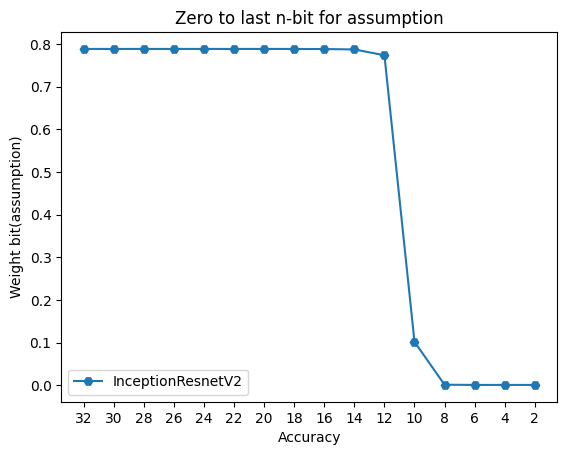

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.plot(bit_decend, accuracy_decend, marker='H')
plt.xlabel('Accuracy')
plt.ylabel('Weight bit(assumption)')
plt.title('Zero to last n-bit for assumption')
plt.legend(['InceptionResnetV2'])

# Set the x-ticks to show all the values in the bit_decend list
plt.xticks(bit_decend)

# Invert the x-axis values
plt.gca().invert_xaxis()

plt.show()

## 32~12비트까지 시각화

In [7]:
bit_decend[:11]

[32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12]

In [8]:
len(accuracy_decend[:11])

11

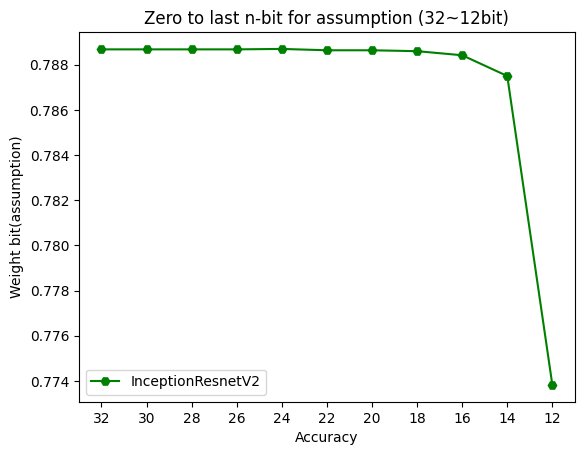

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.plot(bit_decend[:11], accuracy_decend[:11], marker='H', color='green')
plt.xlabel('Accuracy')
plt.ylabel('Weight bit(assumption)')
plt.title('Zero to last n-bit for assumption (32~12bit)')
plt.legend(['InceptionResnetV2'])

# Set the x-ticks to show all the values in the bit_decend list
plt.xticks(bit_decend[:11])

# Invert the x-axis values
plt.gca().invert_xaxis()

plt.show()

## 12~2비트까지 시각화

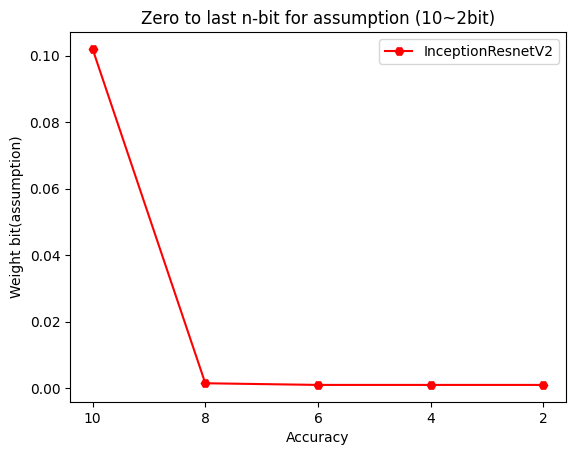

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.plot(bit_decend[11:], accuracy_decend[11:], marker='H', color='red')
plt.xlabel('Accuracy')
plt.ylabel('Weight bit(assumption)')
plt.title('Zero to last n-bit for assumption (10~2bit)')
plt.legend(['InceptionResnetV2'])

# Set the x-ticks to show all the values in the bit_decend list
plt.xticks(bit_decend[11:])

# Invert the x-axis values
plt.gca().invert_xaxis()

plt.show()